# Final Scout Not Dummy Linear_Regression_Regularization

# About the Dataset

- **Auto Scout** datası, 2019'da çevrimiçi otomobil ticaret şirketi [AutoScout24](https://www.autoscout24.com) 'den alınmıştır ve 9 farklı otomobil modelinin birçok özelliğini içermektedir. 

- Bu projede, algoritmalar için zaten önceden işlenmiş ve hazırlanmış veri setini kullanacağız.

- Bu projenin amacı, makine öğrenimi algoritmalarını anlamaktır. Bu nedenle, düzenlenmiş veri üzerinde çalışacağınız için yoğun bir EDA sürecine ihtiyaç duymayacağız.

- Bu senaryoda, regresyon algoritmalarını kullanarak otomobil fiyatlarını tahmin edeceğiz.

- Başlarken gerekli kütüphaneleri içe aktarmamız gerekecek. Ayrıca modellemeye geçmeden önce birkaç ön işleme yapmamız gerekecek.

- Daha sonra sırasıyla Lineer Regresyon, Ridge Regresyon, Lasso Regresyon ve Elastic-Net algoritmalarını uygulayacağız. 

- Modellerimizin başarısını regresyon hata metrikleriyle ve cross validation yöntemiyle ölçebiliriz.

- Daha iyi sonuçlar için, hiperparametre ayarlama yaparak modellerinizin başarısını artırmaya çalışağız. 

- Model için feature ların önemlerini belirleyip kaynak tasarrufu için modelimizi en önemli feature lar ile ayarlayacağız. 

- Son olarak, algoritmaların performanslarını karşılaştıracağız.

- Ayrıca en başarılı tahmin oranına sahip olan algoritma üzerinde daha fazla çalışabilirsiniz.


1. **make_model**: Araçların marka ve model bilgisini içerir.
2. **body_type**: Araçların gövde tipini belirtir (örn. sedan, hatchback).
3. **price**: Araçların fiyat bilgisini içerir.
4. **vat**: KDV bilgisini içerir (genellikle araç satışlarında önemlidir).
5. **km**: Araçların kilometre bilgisini içerir.
6. **Type**: Araç türünü belirtir (örn. yeni, ikinci el).
7. **Fuel**: Kullanılan yakıt türünü belirtir (örn. benzin, dizel).
8. **Gears**: Araçların vites sayısını içerir.
9. **Comfort_Convenience**: Araçların konfor ve kolaylık özelliklerini içerir.
10. **Entertainment_Media**: Eğlence ve medya özelliklerini içerir.
11. **Extras**: Araçların ekstra özelliklerini içerir.
12. **Safety_Security**: Güvenlik özelliklerini içerir.
13. **age**: Araçların yaşı.
14. **Previous_Owners**: Araçların önceki sahip sayısını içerir.
15. **hp_kW**: Araçların beygir gücünü kilowatt cinsinden içerir.
16. **Inspection_new**: Araçların yeni muayene bilgisini içerir.
17. **Paint_Type**: Araçların boya tipini içerir.
18. **Upholstery_type**: Araçların iç döşeme tipini içerir.
19. **Gearing_Type**: Araçların şanzıman tipini içerir.
20. **Displacement_cc**: Motor hacmini santimetreküp (cc) cinsinden belirtir.
21. **Weight_kg**: Araçların ağırlığını kilogram cinsinden belirtir.
22. **Drive_chain**: Araçların çekiş türünü belirtir (örn. ön çekiş, arka çekiş).
23. **cons_comb**: Araçların kombinasyonel yakıt tüketimini litresi 100 kilometre başına belirtir.

**------------**

1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance
 
- 11. Final Model

- 12. Prediction

# Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [3]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df.duplicated().sum()

np.int64(1673)

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().T

count      mean       std      min       25%       50%  \
price           14242.000 18100.969  7421.214 4950.000 12950.000 16950.000   
km              14242.000 32582.110 36856.863    0.000  3898.000 21000.000   
Gears           14242.000     5.940     0.703    5.000     5.000     6.000   
age             14242.000     1.415     1.110    0.000     0.000     1.000   
Previous_Owners 14242.000     1.041     0.337    0.000     1.000     1.000   
hp_kW           14242.000    88.713    26.548   40.000    66.000    85.000   
Inspection_new  14242.000     0.256     0.437    0.000     0.000     0.000   
Displacement_cc 14242.000  1432.890   277.507  890.000  1229.000  1461.000   
Weight_kg       14242.000  1342.399   201.247  840.000  1165.000  1320.000   
cons_comb       14242.000     4.825     0.862    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              47000.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      1.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1487.000   2471.000  
cons_comb           5.400      9.100

In [9]:
df.shape

(14242, 23)

# EDA

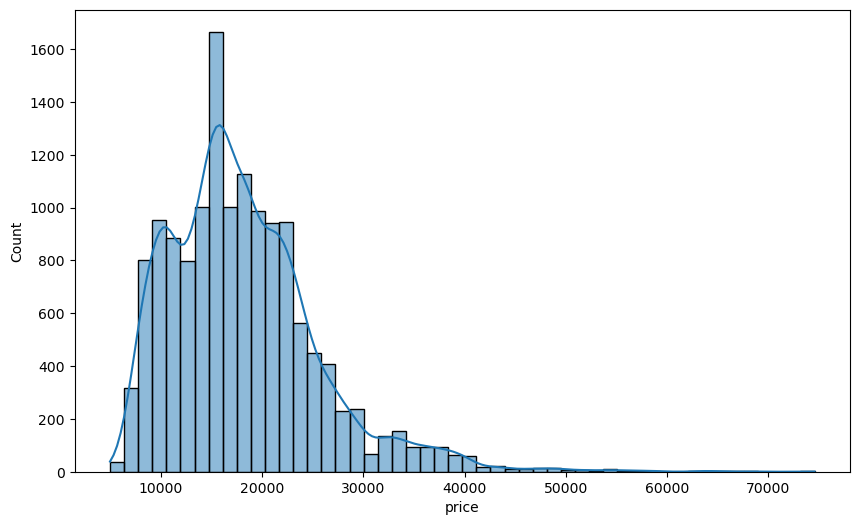

In [10]:
sns.histplot(df.price, bins=50, kde=True);

In [11]:
df_num = df.select_dtypes(include = 'number')
df_num

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0      15770 56013.000  7.000 3.000            2.000  66.000               1   
1      14500 80000.000  7.000 2.000            1.000 141.000               0   
2      14640 83450.000  7.000 3.000            1.000  85.000               0   
3      14500 73000.000  6.000 3.000            1.000  66.000               0   
4      16790 16200.000  7.000 3.000            1.000  66.000               1   
...      ...       ...    ...   ...              ...     ...             ...   
15907  39980   100.000  6.000 0.000            1.000 118.000               0   
15908  39950  1647.363  6.000 0.000            1.000 147.000               0   
15909  39950  1000.000  6.000 0.000            1.000 165.000               0   
15911  39885  9900.000  7.000 0.000            1.000 165.000               0   
15912  39875    15.000  6.000 0.000            1.000 146.000               1   

       Displacement_cc  Weight_kg  cons_comb  
0             1422.000   1220.000      3.800  
1             1798.000   1255.000      5.600  
2             1598.000   1135.000      3.800  
3             1422.000   1195.000      3.800  
4             1422.000   1135.000      4.100  
...                ...        ...        ...  
15907         1598.000   1734.000      4.700  
15908         1997.000   1758.000      5.300  
15909         1798.000   1734.000      6.800  
15911         1798.000   1708.000      7.400  
15912         1997.000   1734.000      5.300  

[14242 rows x 10 columns]

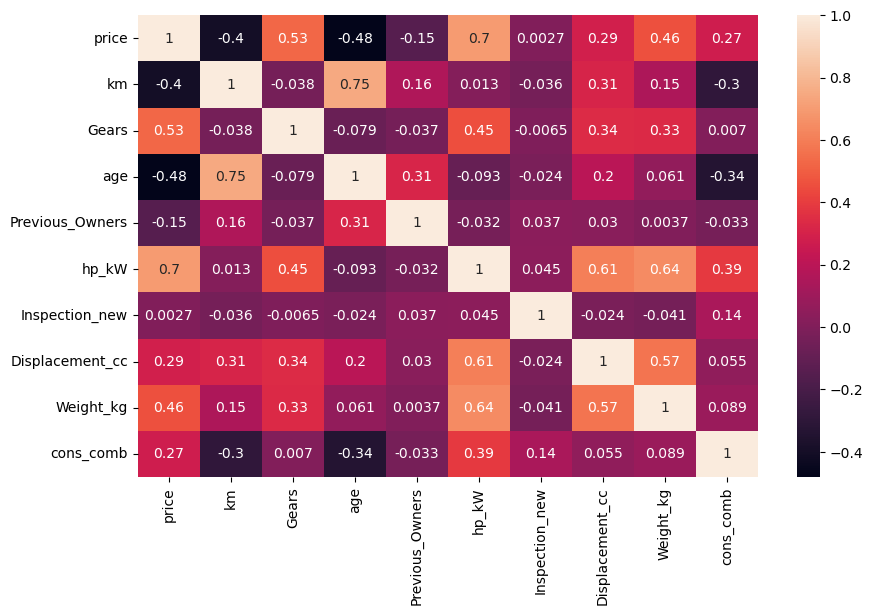

In [12]:
sns.heatmap(df_num.corr(), annot =True);

In [13]:
df_num.corr()[(df_num.corr()>= 0.9) & (df_num.corr() < 1)].any().any()

np.False_

In [14]:
df_num.corr()[(df_num.corr()<= -0.9) & (df_num.corr() > -1)].any().any()

np.False_

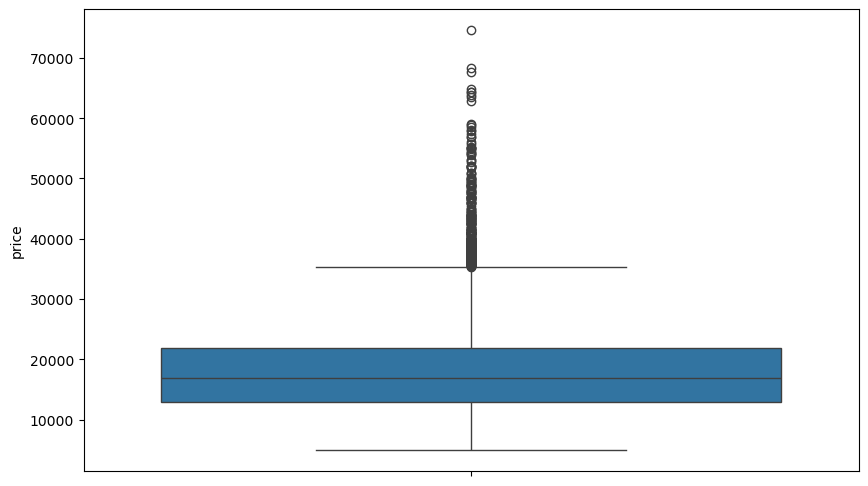

In [15]:
sns.boxplot(df.price);

In [16]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [17]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [18]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
df

make_model body_type  price               vat        km  \
0             Audi A1    Sedans  15770    VAT deductible 56013.000   
1             Audi A1    Sedans  14500  Price negotiable 80000.000   
2             Audi A1    Sedans  14640    VAT deductible 83450.000   
3             Audi A1    Sedans  14500    VAT deductible 73000.000   
4             Audi A1    Sedans  16790    VAT deductible 16200.000   
...               ...       ...    ...               ...       ...   
15907  Renault Espace       Van  39980    VAT deductible   100.000   
15908  Renault Espace       Van  39950    VAT deductible  1647.363   
15909  Renault Espace       Van  39950    VAT deductible  1000.000   
15911  Renault Espace       Van  39885    VAT deductible  9900.000   
15912  Renault Espace       Van  39875    VAT deductible    15.000   

                 Type     Fuel  Gears   age  Previous_Owners   hp_kW  \
0                Used   Diesel  7.000 3.000            2.000  66.000   
1                Used  Benzine  7.000 2.000            1.000 141.000   
2                Used   Diesel  7.000 3.000            1.000  85.000   
3                Used   Diesel  6.000 3.000            1.000  66.000   
4                Used   Diesel  7.000 3.000            1.000  66.000   
...               ...      ...    ...   ...              ...     ...   
15907  Pre-registered   Diesel  6.000 0.000            1.000 118.000   
15908             New   Diesel  6.000 0.000            1.000 147.000   
15909   Demonstration  Benzine  6.000 0.000            1.000 165.000   
15911            Used  Benzine  7.000 0.000            1.000 165.000   
15912  Pre-registered   Diesel  6.000 0.000            1.000 146.000   

       Inspection_new Paint_Type    Upholstery_type Gearing_Type  \
0                   1   Metallic              Cloth    Automatic   
1                   0   Metallic              Cloth    Automatic   
2                   0   Metallic              Cloth    Automatic   
3                   0   Metallic              Cloth    Automatic   
4                   1   Metallic              Cloth    Automatic   
...               ...        ...                ...          ...   
15907               0   Metallic  Part/Full Leather    Automatic   
15908               0   Metallic  Part/Full Leather    Automatic   
15909               0   Metallic  Part/Full Leather    Automatic   
15911               0   Metallic              Cloth    Automatic   
15912               1   Metallic  Part/Full Leather    Automatic   

       Displacement_cc  Weight_kg Drive_chain  cons_comb  cc_Air conditioning  \
0             1422.000   1220.000       front      3.800                    1   
1             1798.000   1255.000       front      5.600                    1   
2             1598.000   1135.000       front      3.800                    1   
3             1422.000   1195.000       front      3.800                    0   
4             1422.000   1135.000       front      4.100                    1   
...                ...        ...         ...        ...                  ...   
15907         1598.000   1734.000       front      4.700                    1   
15908         1997.000   1758.000       front      5.300                    1   
15909         1798.000   1734.000       front      6.800                    1   
15911         1798.000   1708.000       front      7.400                    1   
15912         1997.000   1734.000       front      5.300                    1   

       cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                      0           1                             1   
1                      0           0                             1   
2                      0           0                             0   
3                      1           1                             0   
4                      0           1                             1   
...                  ...         ...                           ...   
15907                  0 

In [19]:
df = pd.get_dummies(df, drop_first =True)

In [20]:
bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [21]:
df.head()

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0  15770 56013.000  7.000 3.000            2.000  66.000               1   
1  14500 80000.000  7.000 2.000            1.000 141.000               0   
2  14640 83450.000  7.000 3.000            1.000  85.000               0   
3  14500 73000.000  6.000 3.000            1.000  66.000               0   
4  16790 16200.000  7.000 3.000            1.000  66.000               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0         1422.000   1220.000      3.800                    1   
1         1798.000   1255.000      5.600                    1   
2         1598.000   1135.000      3.800                    1   
3         1422.000   1195.000      3.800                    0   
4         1422.000   1135.000      4.100                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                 

In [22]:
df.shape

(14242, 134)

In [23]:
df.isnull().any().any()

np.False_

In [24]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


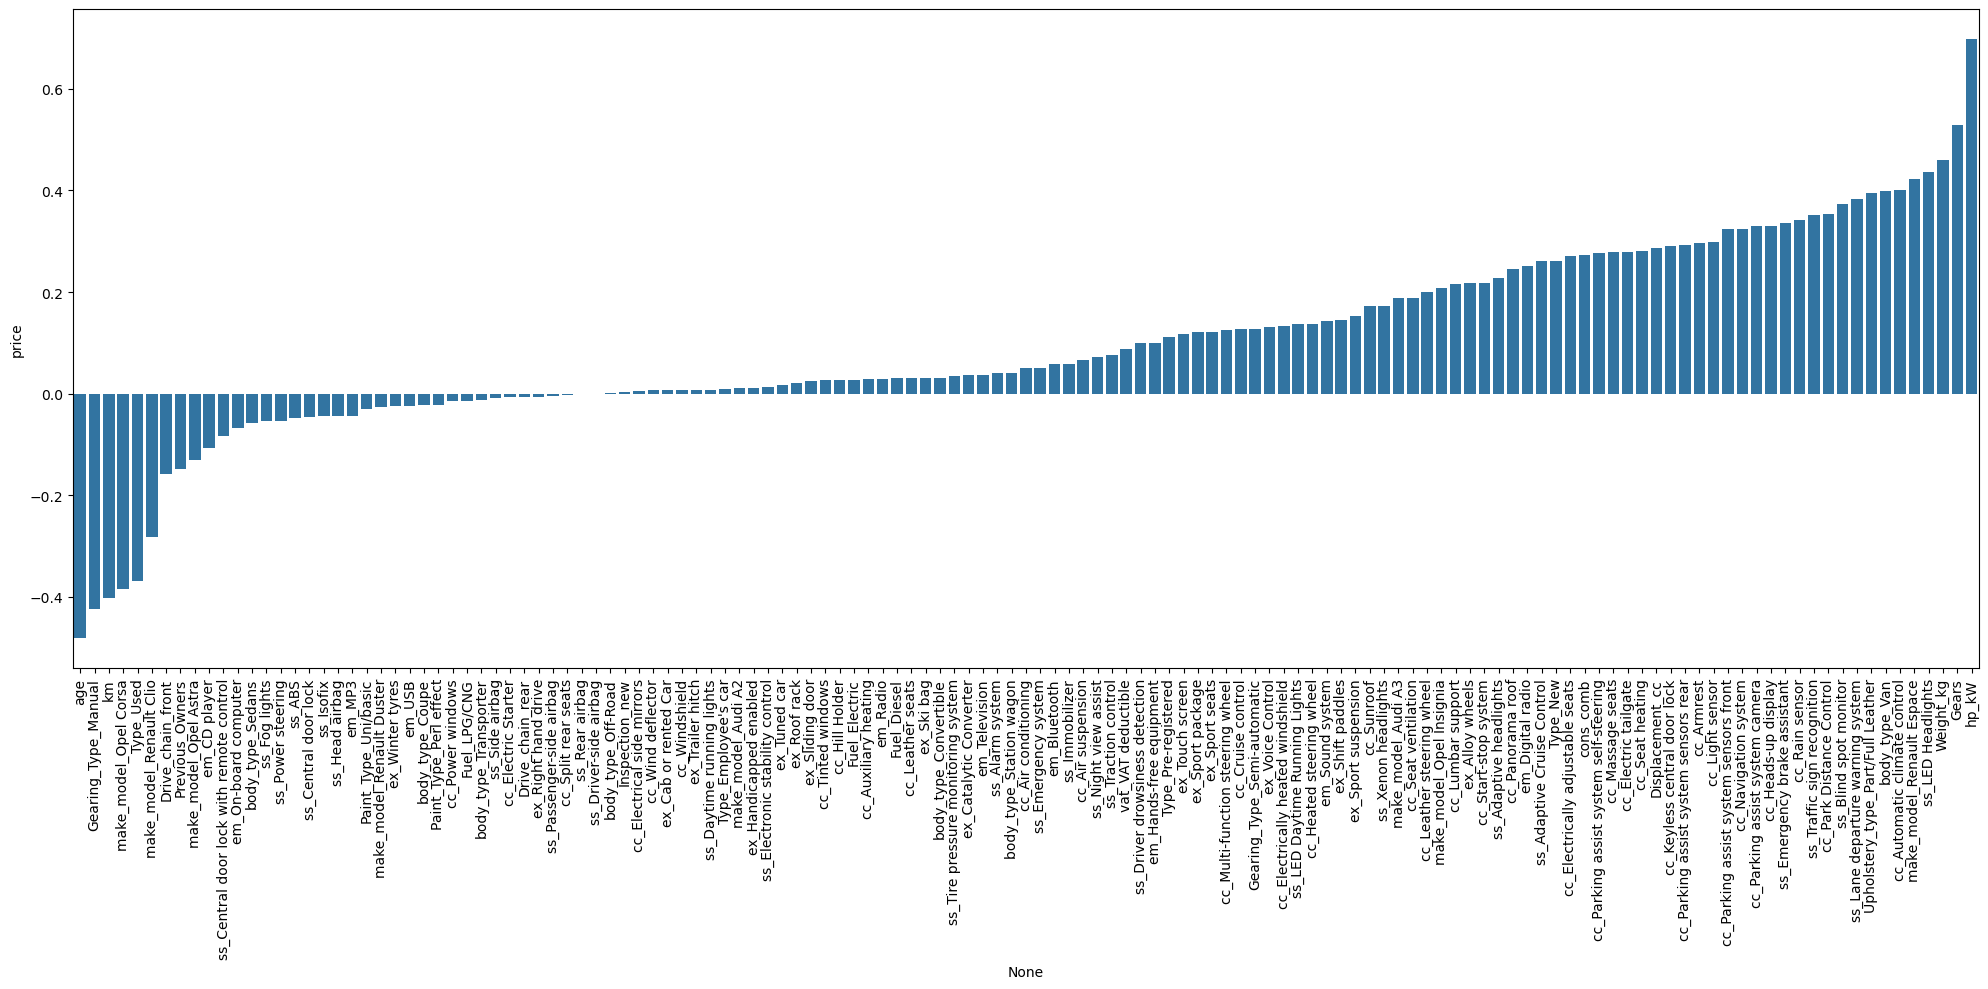

In [25]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# Train | Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X= df.drop(columns="price")
y= df.price

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Scaler

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_train_scaled

array([[ 0.98771662, -1.33125459,  1.43087954, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.88344804,  0.09316067, -1.27481813, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.8389746 ,  0.09316067, -1.27481813, ..., -0.18299012,
         0.11038106, -0.02003509],
       ...,
       [-0.66677972,  1.51757594, -0.37291891, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.7044529 ,  1.51757594, -0.37291891, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.42197195, -1.33125459, -0.37291891, ..., -0.18299012,
         0.11038106, -0.02003509]])

In [33]:
X_test_scaled = scaler.transform(X_test)

In [34]:
X_test_scaled

array([[-0.73568877,  0.09316067, -0.37291891, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.69358825,  1.51757594, -0.37291891, ...,  5.46477603,
         0.11038106, -0.02003509],
       [ 3.4893027 ,  1.51757594,  1.43087954, ...,  5.46477603,
         0.11038106, -0.02003509],
       ...,
       [-0.45184975,  0.09316067, -0.37291891, ..., -0.18299012,
         0.11038106, -0.02003509],
       [-0.88369249,  0.09316067, -1.27481813, ..., -0.18299012,
         0.11038106, -0.02003509],
       [ 0.70580607, -1.33125459,  0.52898031, ..., -0.18299012,
         0.11038106, -0.02003509]])

# Implement Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [38]:
# Gerekli metrikler sklearn'den içe aktarılıyor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin hem eğitim hem de test setindeki performansını değerlendiren bir fonksiyon tanımlanıyor
def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    # Skorları tutacak sözlük yapısı oluşturuluyor
    scores = {
        # Eğitim verisi için performans metrikleri
        i + "_train": {
            "R2": r2_score(y_train, y_train_pred),  # R-kare skoru
            "mae": mean_absolute_error(y_train, y_train_pred),  # Ortalama mutlak hata 
            "mse": mean_squared_error(y_train, y_train_pred),  # Ortalama kare hata
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))  # Kare kök ortalama kare hata
        },
        # Test verisi için performans metrikleri
        i + "_test": {
            "R2": r2_score(y_test, y_pred),  # R-kare skoru
            "mae": mean_absolute_error(y_test, y_pred),  # Ortalama mutlak hata
            "mse": mean_squared_error(y_test, y_pred),  # Ortalama kare hata
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))  # Kare kök ortalama kare hata
        }
    }
    
    # Sözlük yapısı DataFrame'e çevrilip döndürülüyor
    return pd.DataFrame(scores)


In [39]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") # ls = Linear modelin sonuçları
ls

linear_train  linear_test
R2           0.891        0.884
mae       1714.960     1735.035
mse    6114407.562  6179448.623
rmse      2472.733     2485.850

## Multicollineratiy

In [40]:
# Sadece sayısal sütunları seçmek ve korelasyon matrisini oluşturmak
correlation_matrix = pd.DataFrame(df).corr()

# Korelasyon matrisini renklendirme fonksiyonu
def color_corr(val):
    """
    Korelasyon değerlerine göre hücre renklendirme fonksiyonu
    """
    color = ''
    if abs(val) == 1:
        color = 'background-color: #FF6666'  # Mükemmel Korelasyon için kırmızı
    elif 0.7 <= abs(val) < 1:
        color = 'background-color: #FFB266'  # Yüksek Korelasyon için turuncu
    elif 0.3 <= abs(val) < 0.7:
        color = 'background-color: #FFFF66'  # Orta Korelasyon için sarı
    elif 0.1 <= abs(val) < 0.3:
        color = 'background-color: #66FF66'  # Düşük Korelasyon için yeşil
    elif abs(val) == 0:
        color = 'background-color: #FFFFFF'  # Korelasyon yok için beyaz
    return color

# Stil uygulama ve korelasyon matrisini görüntüleme
styled_corr_matrix = correlation_matrix.style.applymap(color_corr)
styled_corr_matrix = styled_corr_matrix.format(precision=2)  # Sayısal biçimlendirme (2 ondalık basamak)
styled_corr_matrix.set_caption("Correlation Matrix ")
styled_corr_matrix

In [41]:
def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f'color: {color}'
# Featurların kendi arasındaki corr. -0.90, +0.90 'dan büyük olan değerleri istediğimiz renkte göstermesi için
# kullanışlı bir fonksiyon oluşturuyoruz. Sizlerde internet üzerinden işinize yarayacak kodları kendi
# notebookunuza uyarlayarak kullanabilirsiniz
# Multicolineraty sorunu linear ve logisitc reg. gibi gradient descent tabanlı modellerde bir problem olarak karşımıza
# çıkar. Multicolineraty sorunu olan datalarda elde ettiğimiz scorelar farklı çıkmayacaktır. Ancak bir feature selection
# yapacaksak bu sorunu mutlaka gidermemiz gerekiyor. Regulirazition algoritmaları overfiting problemini giderdiği gibi
# multicolineraty sorununu da giderir.
# Stil uygulama ve korelasyon matrisini görüntüleme
styled_corr_matrix = correlation_matrix.style.applymap(color_custom)
styled_corr_matrix = styled_corr_matrix.format(precision=2)  # Sayısal biçimlendirme (2 ondalık basamak)
styled_corr_matrix.set_caption("Correlation Matrix ")
styled_corr_matrix

## VIF hesaplama

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# scaled edilmemiş veride VİF hesapladık.
X_df = pd.DataFrame(X)

# VIF hesaplaması
vif_df = pd.DataFrame()
vif_df["Feature"] = X_df.columns
vif_df["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

vif_df


Feature     VIF
0                                          km   5.031
1                                       Gears 150.105
2                                         age  10.099
3                             Previous_Owners  12.832
4                                       hp_kW  94.941
5                              Inspection_new   1.850
6                             Displacement_cc 194.286
7                                   Weight_kg 177.464
8                                   cons_comb 123.785
9                         cc_Air conditioning  27.663
10                          cc_Air suspension   1.190
11                                 cc_Armrest   4.515
12               cc_Automatic climate control   5.111
13                       cc_Auxiliary heating   1.100
14                          cc_Cruise control   6.242
15                        cc_Electric Starter   1.008
16                       cc_Electric tailgate   1.901
17                 cc_Electrical side mirrors   9.485
18           cc_Electrically adjustable seats   1.997
19          cc_Electrically heated windshield   1.476
20                        cc_Heads-up display   1.500
21                   cc_Heated steering wheel   3.566
22                             cc_Hill Holder   3.030
23               cc_Keyless central door lock   2.187
24                           cc_Leather seats   1.104
25                  cc_Leather steering wheel   5.396
26                            cc_Light sensor   5.467
27                          cc_Lumbar support   2.374
28                           cc_Massage seats   1.603
29           cc_Multi-function steering wheel   6.971
30                       cc_Navigation system   4.015
31                           cc_Panorama roof   1.816
32                   cc_Park Distance Control  13.187
33            cc_Parking assist system camera   3.150
34     cc_Parking assist system self-steering   1.661
35     cc_Parking assist system sensors front   3.740
36      cc_Parking assist system sensors rear  13.851
37                           cc_Power windows  23.537
38                             cc_Rain sensor   6.447
39                            cc_Seat heating   4.994
40                        cc_Seat ventilation   1.885
41                        cc_Split rear seats   2.761
42                       cc_Start-stop system   4.387
43                                 cc_Sunroof   1.394
44                          cc_Tinted windows   1.837
45                          cc_Wind deflector   1.123
46                              cc_Windshield   1.015
47                               em_Bluetooth   8.736
48                               em_CD player   2.436
49                           em_Digital radio   1.669
50                    em_Hands-free equipment   5.694
51                                     em_MP3   2.370
52                       em_On-board computer   8.701
53                                   em_Radio   7.757
54                            em_Sound system   1.573
55                              em_Television   1.138
56                                     em_USB   4.189
57                            ex_Alloy wheels  10.925
58                       ex_Cab or rented Car   1.139
59                     ex_Catalytic Converter   1.495
60                     ex_Handicapped enabled   1.080
61                        ex_Right hand drive   1.046
62                               ex_Roof rack   3.194
63                           ex_Shift paddles   1.226
64                                 ex_Ski bag   1.208
65                            ex_Sliding door   1.036
66                           ex_Sport package   1.500
67                             ex_Sport seats   2.061
68                        ex_Sport suspension   1.686
69                            ex_Touch screen   2.630
70                           ex_Trailer hitch   1.202
71                               ex_Tuned car   1.025
72                           ex_Voice Control   2.267
73                            ex_Winter ty

In [43]:
high_vif = vif_df[vif_df.iloc[:, 1] >= 10]
high_vif

Feature     VIF
1                                    Gears 150.105
2                                      age  10.099
3                          Previous_Owners  12.832
4                                    hp_kW  94.941
6                          Displacement_cc 194.286
7                                Weight_kg 177.464
8                                cons_comb 123.785
9                      cc_Air conditioning  27.663
32                cc_Park Distance Control  13.187
36   cc_Parking assist system sensors rear  13.851
37                        cc_Power windows  23.537
57                         ex_Alloy wheels  10.925
74                                  ss_ABS  28.476
79                    ss_Central door lock  11.744
83                   ss_Driver-side airbag  30.391
84         ss_Electronic stability control  14.530
95                ss_Passenger-side airbag  23.778
96                       ss_Power steering  15.695
98                          ss_Side airbag  14.960
110              make_model_Renault Espace  11.518
118                     vat_VAT deductible  20.857
122                              Type_Used  18.326
123                            Fuel_Diesel  12.532
131                      Drive_chain_front  84.244

In [44]:
len(high_vif)

24

In [45]:
# Scale uygulanmış datada VIF hesaplayalım.
X_df = pd.DataFrame(X_train_scaled)

# VIF hesaplaması
vif_df = pd.DataFrame()
vif_df["Feature"] = X_df.columns
vif_df["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

vif_df

Feature    VIF
0          0  2.849
1          1  2.943
2          2  3.874
3          3  1.240
4          4  7.926
5          5  1.389
6          6  6.997
7          7  4.565
8          8  4.453
9          9  1.289
10        10  1.195
11        11  2.324
12        12  2.121
13        13  1.081
14        14  1.662
15        15    NaN
16        16  1.781
17        17  1.959
18        18  1.717
19        19  1.394
20        20  1.463
21        21  2.834
22        22  1.695
23        23  1.881
24        24  1.115
25        25  2.076
26        26  2.693
27        27  1.862
28        28  1.558
29        29  1.760
30        30  1.843
31        31  1.760
32        32  4.366
33        33  2.381
34        34  1.572
35        35  2.244
36        36  5.048
37        37  1.555
38        38  2.805
39        39  2.628
40        40  1.723
41        41  2.307
42        42  1.800
43        43  1.413
44        44  1.670
45        45  1.145
46        46  1.019
47        47  1.776
48        48  1.629
49        49  1.413
50        50  2.004
51        51  1.443
52        52  1.467
53        53  1.306
54        54  1.383
55        55  1.192
56        56  1.845
57        57  1.395
58        58  1.120
59        59  1.286
60        60  1.062
61        61  1.073
62        62  2.615
63        63  1.203
64        64  1.212
65        65  1.068
66        66  1.389
67        67  1.642
68        68  1.533
69        69  1.955
70        70  1.150
71        71  1.036
72        72  1.639
73        73  1.155
74        74  1.469
75        75  1.584
76        76  1.783
77        77  1.571
78        78  2.344
79        79  1.765
80        80  2.604
81        81  1.930
82        82  1.225
83        83  1.766
84        84  1.576
85        85  1.989
86        86  1.469
87        87  1.463
88        88  2.711
89        89  1.639
90        90  1.695
91        91  1.819
92        92  1.965
93        93  2.587
94        94  1.202
95        95  2.036
96        96  1.369
97        97  1.579
98        98  1.752
99        99  1.983
100      100  1.482
101      101  2.411
102      102  1.899
103      103  1.073
104      104  3.507
105      105  4.344
106      106  5.330
107      107  6.664
108      108  3.361
109      109  2.201
110      110 11.499
111      111  1.040
112      112  1.045
113      113  2.153
114      114  2.657
115      115  4.629
116      116  1.401
117      117  7.982
118      118  1.237
119      119  2.344
120      120  2.763
121      121  2.410
122      122  5.397
123      123  6.764
124      124  1.050
125      125  1.072
126      126  1.040
127      127  1.126
128      128  1.606
129      129  2.436
130      130  1.454
131      131  1.369
132      132  1.059

In [46]:
high_vif = vif_df[vif_df.iloc[:, 1] >= 10]
high_vif # VİF değerlerine bakarak Multicollinearity yok diyebiliriz

Feature    VIF
110      110 11.499

## Cross Validate

In [47]:
from sklearn.metrics import get_scorer_names

scorer_list = get_scorer_names()
scorer_list

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [48]:
from sklearn.model_selection import cross_validate, cross_val_score

In [49]:
model = LinearRegression()

In [50]:
scores = cross_validate(model, 
                       X_train_scaled,
                       y_train,
                       scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                       cv = 10, 
                       return_train_score = True)
scores

{'fit_time': array([0.0359447 , 0.03773069, 0.03235412, 0.03721452, 0.03552604,
        0.03578019, 0.03411865, 0.03645372, 0.03549933, 0.0362339 ]),
 'score_time': array([0.00449681, 0.00450897, 0.00334501, 0.00393534, 0.0033977 ,
        0.00417066, 0.00427532, 0.00416136, 0.00393963, 0.00419712]),
 'test_r2': array([0.87912206, 0.88866596, 0.88415477, 0.90063047, 0.8769856 ,
        0.8974324 , 0.87838684, 0.88194845, 0.88148948, 0.88700901]),
 'train_r2': array([0.89147448, 0.89047964, 0.89096628, 0.88922469, 0.89171268,
        0.88950313, 0.8916162 , 0.89126813, 0.89141728, 0.8905867 ]),
 'test_neg_mean_absolute_error': array([-1755.39921617, -1753.53752326, -1655.30482711, -1665.25429948,
        -1810.14096425, -1715.99985319, -1772.44009352, -1753.4764493 ,
        -1829.5327658 , -1748.37455016]),
 'train_neg_mean_absolute_error': array([-1715.1304358 , -1715.7607865 , -1723.71390784, -1726.5081365 ,
        -1703.87911612, -1714.64510669, -1708.06665703, -1712.31160561,
    

In [51]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.036       0.004    0.879     0.891                     -1755.399   
2      0.038       0.005    0.889     0.890                     -1753.538   
3      0.032       0.003    0.884     0.891                     -1655.305   
4      0.037       0.004    0.901     0.889                     -1665.254   
5      0.036       0.003    0.877     0.892                     -1810.141   
6      0.036       0.004    0.897     0.890                     -1716.000   
7      0.034       0.004    0.878     0.892                     -1772.440   
8      0.036       0.004    0.882     0.891                     -1753.476   
9      0.035       0.004    0.881     0.891                     -1829.533   
10     0.036       0.004    0.887     0.891                     -1748.375   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1715.130                 -6505775.930   
2                       -1715.761                 -6240132.287   
3                       -1723.714                 -5952876.986   
4                       -1726.508                 -5712010.721   
5                       -1703.879                 -7172696.834   
6                       -1714.645                 -5834858.934   
7                       -1708.067                 -6617713.579   
8                       -1712.312                 -6687891.494   
9                       -1701.414                 -7141825.903   
10                      -1716.694                 -5958918.485   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6086851.523                         -2550.642   
2                   -6118103.801                         -2498.026   
3                   -6147391.951                         -2439.852   
4                   -6171156.241                         -2389.981   
5                   -6022568.562                         -2678.189   
6                   -6158378.163                         -2415.545   
7                   -6073614.277                         -2572.492   
8                   -6067359.452                         -2586.096   
9                   -6015466.165                         -2672.419   
10                  -6151642.859                         -2441.090   

    train_neg_root_mean_squared_error  
1                           -2467.155  
2                           -2473.480  
3                           -2479.393  
4                           -2484.181  
5                           -2454.092  
6                           -2481.608  
7                           -2464.470  
8                           -2463.201  
9                           -2452.645  
10                          -2480.251

In [52]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                    0.886
train_r2                                   0.891
test_neg_mean_absolute_error           -1745.946
train_neg_mean_absolute_error          -1713.812
test_neg_mean_squared_error         -6382470.115
train_neg_mean_squared_error        -6101253.299
test_neg_root_mean_squared_error       -2524.433
train_neg_root_mean_squared_error      -2470.048
dtype: float64

In [53]:
ls

linear_train  linear_test
R2           0.891        0.884
mae       1714.960     1735.035
mse    6114407.562  6179448.623
rmse      2472.733     2485.850

In [54]:
lm.coef_ # linear model katsayıları 

array([-1.43467159e+03,  4.04878094e+02, -1.72010501e+03,  7.19605424e+01,
        2.56472550e+03, -6.74413962e+01, -2.65086351e+02, -2.37527050e+02,
        7.99529588e+01,  8.28551513e+01, -7.09916195e+00,  6.32879336e+01,
        7.00176756e+01, -4.93667041e+00,  1.10091105e+02, -1.70530257e-12,
       -5.16945815e+01,  1.33231595e+01,  4.29652756e+01,  1.20778749e+02,
        4.79180888e+02,  1.36737471e+02,  3.48141451e+01,  7.55972273e+01,
       -5.06556292e+01,  2.44969923e+01,  8.12098293e+01, -1.14046284e+02,
        1.69579685e+01,  9.16763935e+01,  1.66081155e+02, -5.27019870e+01,
        3.04262515e+02,  3.18403526e+01,  1.98311340e+02,  4.60463445e+01,
       -1.89507747e+02, -1.83278284e+01, -1.36403671e+02,  2.61966179e+01,
        2.44698486e+02, -8.25903398e+01, -4.70624921e+00,  9.39301956e+01,
        5.07811202e+01, -2.91154106e+01, -1.04282549e+01, -2.64724287e+02,
        1.99217432e+01,  2.86725493e+02,  5.13614449e+01,  2.81145503e+01,
       -4.30608851e+01,  

In [55]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0   -1434.672
1     404.878
2   -1720.105
3      71.961
4    2564.726
5     -67.441
6    -265.086
7    -237.527
8      79.953
9      82.855
10     -7.099
11     63.288
12     70.018
13     -4.937
14    110.091
15     -0.000
16    -51.695
17     13.323
18     42.965
19    120.779
20    479.181
21    136.737
22     34.814
23     75.597
24    -50.656
25     24.497
26     81.210
27   -114.046
28     16.958
29     91.676
30    166.081
31    -52.702
32    304.263
33     31.840
34    198.311
35     46.046
36   -189.508
37    -18.328
38   -136.404
39     26.197
40    244.698
41    -82.590
42     -4.706
43     93.930
44     50.781
45    -29.115
46    -10.428
47   -264.724
48     19.922
49    286.725
50     51.361
51     28.115
52    -43.061
53     49.956
54    -62.937
55    -36.416
56   -155.150
57     74.162
58     22.624
59     36.030
60     -7.918
61    -11.231
62     19.487
63     67.651
64    -59.861
65     20.144
66    154.650
67     70.169
68     -4.895
69   -148.423
70     21.591
71     49.626
72    -41.637
73      6.956
74    -14.630
75     42.648
76    -26.888
77      6.679
78    -44.048
79    -85.548
80    -32.786
81   -116.000
82     19.302
83      7.480
84    -70.746
85     39.045
86   -210.427
87    -27.443
88    -42.415
89   -142.436
90   -147.782
91    -39.291
92    351.557
93    244.818
94     -0.274
95    178.184
96   -158.044
97   -178.149
98      2.139
99     51.844
100    44.029
101    40.443
102  -181.221
103    79.669
104   536.359
105 -1426.929
106 -1799.779
107  -549.082
108 -1633.657
109  -375.834
110   883.815
111   -11.487
112   -35.290
113    18.559
114    34.526
115   109.904
116  -109.239
117   237.890
118    52.783
119  -691.881
120  -129.202
121  -542.579
122 -1206.212
123   409.124
124   141.744
125    12.285
126    20.156
127     6.046
128   108.492
129  -656.956
130   420.791
131  -212.681
132   -67.936

# Implement Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge_model = Ridge(alpha=1.0)

In [58]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [59]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [60]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train  ridge_test
R2          0.891       0.884
mae      1714.906    1734.964
mse   6114408.735 6179352.091
rmse     2472.733    2485.830

In [61]:
pd.concat([ls, rs], axis=1)

linear_train  linear_test  ridge_train  ridge_test
R2           0.891        0.884        0.891       0.884
mae       1714.960     1735.035     1714.906    1734.964
mse    6114407.562  6179448.623  6114408.735 6179352.091
rmse      2472.733     2485.850     2472.733    2485.830

## Cross Validate

In [62]:
model = Ridge()

scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv=10, return_train_score=True)
scores

{'fit_time': array([0.02004027, 0.0186615 , 0.01734924, 0.0179646 , 0.01924706,
        0.01917362, 0.01827168, 0.01843286, 0.01760125, 0.01898861]),
 'score_time': array([0.00362277, 0.00426197, 0.00401664, 0.00345802, 0.00405955,
        0.0042069 , 0.00411415, 0.00276709, 0.00422978, 0.00431085]),
 'test_r2': array([0.87912728, 0.88866762, 0.88415544, 0.9006333 , 0.87698473,
        0.89743459, 0.87839729, 0.88194152, 0.88148227, 0.8870077 ]),
 'train_r2': array([0.89147445, 0.89047962, 0.89096625, 0.88922466, 0.89171266,
        0.88950311, 0.89161617, 0.8912681 , 0.89141725, 0.89058667]),
 'test_neg_mean_absolute_error': array([-1755.36937415, -1753.48843915, -1655.25066101, -1665.12146958,
        -1810.11437457, -1715.92991839, -1772.27911003, -1753.43555954,
        -1829.44396601, -1748.39281818]),
 'train_neg_mean_absolute_error': array([-1715.06730272, -1715.70615715, -1723.6532627 , -1726.45189821,
        -1703.81899293, -1714.58592425, -1708.01329002, -1712.25921199,
    

In [63]:
scores = pd.DataFrame(scores, index = range(1,11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.020       0.004    0.879     0.891                     -1755.369   
2      0.019       0.004    0.889     0.890                     -1753.488   
3      0.017       0.004    0.884     0.891                     -1655.251   
4      0.018       0.003    0.901     0.889                     -1665.121   
5      0.019       0.004    0.877     0.892                     -1810.114   
6      0.019       0.004    0.897     0.890                     -1715.930   
7      0.018       0.004    0.878     0.892                     -1772.279   
8      0.018       0.003    0.882     0.891                     -1753.436   
9      0.018       0.004    0.881     0.891                     -1829.444   
10     0.019       0.004    0.887     0.891                     -1748.393   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1715.067                 -6505494.707   
2                       -1715.706                 -6240039.156   
3                       -1723.653                 -5952842.496   
4                       -1726.452                 -5711848.206   
5                       -1703.819                 -7172747.781   
6                       -1714.586                 -5834734.456   
7                       -1708.013                 -6617144.939   
8                       -1712.259                 -6688284.508   
9                       -1701.359                 -7142260.630   
10                      -1716.629                 -5958987.596   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6086853.001                         -2550.587   
2                   -6118105.244                         -2498.007   
3                   -6147393.426                         -2439.845   
4                   -6171157.679                         -2389.947   
5                   -6022570.001                         -2678.199   
6                   -6158379.611                         -2415.520   
7                   -6073615.810                         -2572.381   
8                   -6067360.869                         -2586.172   
9                   -6015467.566                         -2672.501   
10                  -6151644.291                         -2441.104   

    train_neg_root_mean_squared_error  
1                           -2467.155  
2                           -2473.480  
3                           -2479.394  
4                           -2484.181  
5                           -2454.093  
6                           -2481.608  
7                           -2464.471  
8                           -2463.201  
9                           -2452.645  
10                          -2480.251

In [64]:
scores.iloc[:, 2:].mean()

test_r2                                    0.886
train_r2                                   0.891
test_neg_mean_absolute_error           -1745.883
train_neg_mean_absolute_error          -1713.754
test_neg_mean_squared_error         -6382438.448
train_neg_mean_squared_error        -6101254.750
test_neg_root_mean_squared_error       -2524.426
train_neg_root_mean_squared_error      -2470.048
dtype: float64

In [65]:
rs

ridge_train  ridge_test
R2          0.891       0.884
mae      1714.906    1734.964
mse   6114408.735 6179352.091
rmse     2472.733    2485.830

In [66]:
ridge_model.coef_

array([-1.43458014e+03,  4.05205113e+02, -1.71998026e+03,  7.18580493e+01,
        2.56322137e+03, -6.74933871e+01, -2.64154111e+02, -2.37155474e+02,
        7.98073453e+01,  8.28453381e+01, -7.09057433e+00,  6.34643010e+01,
        7.02149788e+01, -4.95373805e+00,  1.09876873e+02,  0.00000000e+00,
       -5.16033993e+01,  1.32035410e+01,  4.29388885e+01,  1.20771730e+02,
        4.79176219e+02,  1.36419431e+02,  3.46643487e+01,  7.55561680e+01,
       -5.06274473e+01,  2.45705833e+01,  8.12164524e+01, -1.13987562e+02,
        1.70125478e+01,  9.16843210e+01,  1.66034434e+02, -5.26785824e+01,
        3.04284459e+02,  3.18228667e+01,  1.98293741e+02,  4.59733745e+01,
       -1.89365112e+02, -1.83572783e+01, -1.36289114e+02,  2.64742335e+01,
        2.44725395e+02, -8.25189074e+01, -4.50464539e+00,  9.39472165e+01,
        5.07140325e+01, -2.90975653e+01, -1.04325276e+01, -2.64683264e+02,
        1.99475641e+01,  2.86688323e+02,  5.13144362e+01,  2.81198366e+01,
       -4.32347720e+01,  

In [67]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df

ridge_coef_1
0       -1434.580
1         405.205
2       -1719.980
3          71.858
4        2563.221
5         -67.493
6        -264.154
7        -237.155
8          79.807
9          82.845
10         -7.091
11         63.464
12         70.215
13         -4.954
14        109.877
15          0.000
16        -51.603
17         13.204
18         42.939
19        120.772
20        479.176
21        136.419
22         34.664
23         75.556
24        -50.627
25         24.571
26         81.216
27       -113.988
28         17.013
29         91.684
30        166.034
31        -52.679
32        304.284
33         31.823
34        198.294
35         45.973
36       -189.365
37        -18.357
38       -136.289
39         26.474
40        244.725
41        -82.519
42         -4.505
43         93.947
44         50.714
45        -29.098
46        -10.433
47       -264.683
48         19.948
49        286.688
50         51.314
51         28.120
52        -43.235
53         49.996
54        -62.873
55        -36.416
56       -155.245
57         74.261
58         22.655
59         36.039
60         -7.925
61        -11.238
62         19.373
63         67.722
64        -59.911
65         20.185
66        154.661
67         70.174
68         -4.742
69       -148.503
70         21.511
71         49.624
72        -41.539
73          6.934
74        -14.753
75         42.638
76        -26.910
77          6.682
78        -43.989
79        -85.558
80        -32.824
81       -115.973
82         19.314
83          7.431
84        -70.694
85         39.089
86       -210.418
87        -27.586
88        -42.373
89       -142.373
90       -147.831
91        -39.446
92        351.611
93        244.953
94         -0.254
95        178.136
96       -158.003
97       -178.177
98          2.226
99         51.788
100        44.060
101        40.358
102      -181.021
103        79.677
104       536.701
105     -1425.618
106     -1799.021
107      -547.917
108     -1632.603
109      -375.779
110       884.121
111       -11.498
112       -35.272
113        18.504
114        34.431
115       109.711
116      -109.211
117       238.227
118        52.792
119      -691.360
120      -128.626
121      -542.021
122     -1205.432
123       408.116
124       141.717
125        12.212
126        20.127
127         6.046
128       108.546
129      -656.954
130       420.796
131      -212.729
132       -67.944

In [68]:
pd.concat([lm_df, rm_df], axis=1)

lm_coef  ridge_coef_1
0   -1434.672     -1434.580
1     404.878       405.205
2   -1720.105     -1719.980
3      71.961        71.858
4    2564.726      2563.221
5     -67.441       -67.493
6    -265.086      -264.154
7    -237.527      -237.155
8      79.953        79.807
9      82.855        82.845
10     -7.099        -7.091
11     63.288        63.464
12     70.018        70.215
13     -4.937        -4.954
14    110.091       109.877
15     -0.000         0.000
16    -51.695       -51.603
17     13.323        13.204
18     42.965        42.939
19    120.779       120.772
20    479.181       479.176
21    136.737       136.419
22     34.814        34.664
23     75.597        75.556
24    -50.656       -50.627
25     24.497        24.571
26     81.210        81.216
27   -114.046      -113.988
28     16.958        17.013
29     91.676        91.684
30    166.081       166.034
31    -52.702       -52.679
32    304.263       304.284
33     31.840        31.823
34    198.311       198.294
35     46.046        45.973
36   -189.508      -189.365
37    -18.328       -18.357
38   -136.404      -136.289
39     26.197        26.474
40    244.698       244.725
41    -82.590       -82.519
42     -4.706        -4.505
43     93.930        93.947
44     50.781        50.714
45    -29.115       -29.098
46    -10.428       -10.433
47   -264.724      -264.683
48     19.922        19.948
49    286.725       286.688
50     51.361        51.314
51     28.115        28.120
52    -43.061       -43.235
53     49.956        49.996
54    -62.937       -62.873
55    -36.416       -36.416
56   -155.150      -155.245
57     74.162        74.261
58     22.624        22.655
59     36.030        36.039
60     -7.918        -7.925
61    -11.231       -11.238
62     19.487        19.373
63     67.651        67.722
64    -59.861       -59.911
65     20.144        20.185
66    154.650       154.661
67     70.169        70.174
68     -4.895        -4.742
69   -148.423      -148.503
70     21.591        21.511
71     49.626        49.624
72    -41.637       -41.539
73      6.956         6.934
74    -14.630       -14.753
75     42.648        42.638
76    -26.888       -26.910
77      6.679         6.682
78    -44.048       -43.989
79    -85.548       -85.558
80    -32.786       -32.824
81   -116.000      -115.973
82     19.302        19.314
83      7.480         7.431
84    -70.746       -70.694
85     39.045        39.089
86   -210.427      -210.418
87    -27.443       -27.586
88    -42.415       -42.373
89   -142.436      -142.373
90   -147.782      -147.831
91    -39.291       -39.446
92    351.557       351.611
93    244.818       244.953
94     -0.274        -0.254
95    178.184       178.136
96   -158.044      -158.003
97   -178.149      -178.177
98      2.139         2.226
99     51.844        51.788
100    44.029        44.060
101    40.443        40.358
102  -181.221      -181.021
103    79.669        79.677
104   536.359       536.701
105 -1426.929     -1425.618
106 -1799.779     -1799.021
107  -549.082      -547.917
108 -1633.657     -1632.603
109  -375.834      -375.779
110   883.815       884.121
111   -11.487       -11.498
112   -35.290       -35.272
113    18.559        18.504
114    34.526        34.431
115   109.904       109.711
116  -109.239      -109.211
117   237.890       238.227
118    52.783        52.792
119  -691.881      -691.360
120  -129.202      -128.626
121  -542.579      -542.021
122 -1206.212     -1205.432
123   409.124       408.116
124   141.744       141.717
125    12.285        12.212
126    20.156        20.127
127     6.046         6.046
128   108.492       108.546
129  -656.956      -656.954
130   420.791       420.796
131  -212.681      -212.729
132   -67.936       -67.944

## GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [71]:
param_grid = {
    "alpha" : alpha_space
}

In [72]:
ridge_model = Ridge()

In [73]:
grid_ridge = GridSearchCV(estimator = ridge_model,
                         param_grid = param_grid,
                         scoring = "neg_root_mean_squared_error",
                         cv = 10,
                         verbose = 3,
                         return_train_score = True)

In [74]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END alpha=0.01;, score=(train=-2467.155, test=-2550.642) total time=   0.0s
[CV 2/10] END alpha=0.01;, score=(train=-2473.480, test=-2498.025) total time=   0.0s
[CV 3/10] END alpha=0.01;, score=(train=-2479.393, test=-2439.852) total time=   0.0s
[CV 4/10] END alpha=0.01;, score=(train=-2484.181, test=-2389.981) total time=   0.0s
[CV 5/10] END alpha=0.01;, score=(train=-2454.092, test=-2678.189) total time=   0.0s
[CV 6/10] END alpha=0.01;, score=(train=-2481.608, test=-2415.545) total time=   0.0s
[CV 7/10] END alpha=0.01;, score=(train=-2464.470, test=-2572.491) total time=   0.0s
[CV 8/10] END alpha=0.01;, score=(train=-2463.201, test=-2586.097) total time=   0.0s
[CV 9/10] END alpha=0.01;, score=(train=-2452.645, test=-2672.420) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-2480.251, test=-2441.090) total time=   0.0s
[CV 1/10] END alpha=0.02;, score=(train=-2467.155, test=-2550.641) total t

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [75]:
grid_ridge.best_params_

{'alpha': np.float64(1.0)}

In [76]:
df_grid_ridge = pd.DataFrame(grid_ridge.cv_results_)
df_grid_ridge

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0           0.019         0.001            0.002           0.000        0.010   
1           0.018         0.001            0.002           0.000        0.020   
2           0.018         0.001            0.002           0.000        0.030   
3           0.018         0.001            0.002           0.000        0.040   
4           0.018         0.001            0.002           0.000        0.050   
5           0.018         0.001            0.002           0.000        0.060   
6           0.019         0.001            0.002           0.000        0.070   
7           0.019         0.001            0.002           0.000        0.080   
8           0.018         0.001            0.002           0.000        0.090   
9           0.018         0.001            0.002           0.000        0.100   
10          0.018         0.001            0.002           0.000        0.110   
11          0.018         0.000            0.002           0.000        0.120   
12          0.018         0.001            0.002           0.000        0.130   
13          0.018         0.001            0.002           0.000        0.140   
14          0.018         0.001            0.002           0.000        0.150   
15          0.018         0.001            0.002           0.000        0.160   
16          0.018         0.001            0.002           0.000        0.170   
17          0.018         0.001            0.002           0.000        0.180   
18          0.018         0.001            0.002           0.000        0.190   
19          0.018         0.001            0.001           0.000        0.200   
20          0.018         0.001            0.001           0.000        0.210   
21          0.019         0.001            0.002           0.000        0.220   
22          0.020         0.001            0.002           0.000        0.230   
23          0.019         0.001            0.002           0.000        0.240   
24          0.018         0.001            0.002           0.000        0.250   
25          0.018         0.001            0.002           0.000        0.260   
26          0.018         0.001            0.002           0.000        0.270   
27          0.018         0.001            0.002           0.000        0.280   
28          0.019         0.001            0.002           0.000        0.290   
29          0.018         0.001            0.002           0.000        0.300   
30          0.018         0.000            0.002           0.000        0.310   
31          0.018         0.001            0.002           0.000        0.320   
32          0.018         0.001            0.002           0.000        0.330   
33          0.018         0.001            0.002           0.000        0.340   
34          0.018         0.001            0.002           0.000        0.350   
35          0.018         0.001            0.002           0.000        0.360   
36          0.018         0.001            0.002           0.000        0.370   
37          0.018         0.001            0.002           0.000        0.380   
38          0.020         0.000            0.002           0.000        0.390   
39          0.019         0.001            0.002           0.000        0.400   
40          0.019         0.001            0.002           0.000        0.410   
41          0.019         0.001            0.002           0.000        0.420   
42          0.019         0.001            0.002           0.000        0.430   
43          0.019         0.001            0.002           0.000        0.440   
44          0.019         0.001            0.002           0.000        0.450   
45          0.020         0.001            0.002           0.000        0.460   
46          0.019         0.001            0.002           0.000        0.470   
47          0.019         0.001            0.002           0.000        0.480   
48          0.019         0.001    

In [77]:
dir(grid_ridge)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr

In [78]:
df_grid_ridge[["param_alpha", "mean_test_score", "mean_train_score"]].apply(abs)

param_alpha  mean_test_score  mean_train_score
0         0.010         2524.433          2470.048
1         0.020         2524.433          2470.048
2         0.030         2524.433          2470.048
3         0.040         2524.433          2470.048
4         0.050         2524.433          2470.048
5         0.060         2524.433          2470.048
6         0.070         2524.433          2470.048
7         0.080         2524.433          2470.048
8         0.090         2524.433          2470.048
9         0.100         2524.432          2470.048
10        0.110         2524.432          2470.048
11        0.120         2524.432          2470.048
12        0.130         2524.432          2470.048
13        0.140         2524.432          2470.048
14        0.150         2524.432          2470.048
15        0.160         2524.432          2470.048
16        0.170         2524.432          2470.048
17        0.180         2524.432          2470.048
18        0.190         2524.432          2470.048
19        0.200         2524.432          2470.048
20        0.210         2524.432          2470.048
21        0.220         2524.432          2470.048
22        0.230         2524.432          2470.048
23        0.240         2524.431          2470.048
24        0.250         2524.431          2470.048
25        0.260         2524.431          2470.048
26        0.270         2524.431          2470.048
27        0.280         2524.431          2470.048
28        0.290         2524.431          2470.048
29        0.300         2524.431          2470.048
30        0.310         2524.431          2470.048
31        0.320         2524.431          2470.048
32        0.330         2524.431          2470.048
33        0.340         2524.431          2470.048
34        0.350         2524.431          2470.048
35        0.360         2524.431          2470.048
36        0.370         2524.431          2470.048
37        0.380         2524.430          2470.048
38        0.390         2524.430          2470.048
39        0.400         2524.430          2470.048
40        0.410         2524.430          2470.048
41        0.420         2524.430          2470.048
42        0.430         2524.430          2470.048
43        0.440         2524.430          2470.048
44        0.450         2524.430          2470.048
45        0.460         2524.430          2470.048
46        0.470         2524.430          2470.048
47        0.480         2524.430          2470.048
48        0.490         2524.430          2470.048
49        0.500         2524.430          2470.048
50        0.510         2524.430          2470.048
51        0.520         2524.429          2470.048
52        0.530         2524.429          2470.048
53        0.540         2524.429          2470.048
54        0.550         2524.429          2470.048
55        0.560         2524.429          2470.048
56        0.570         2524.429          2470.048
57        0.580         2524.429          2470.048
58        0.590         2524.429          2470.048
59        0.600         2524.429          2470.048
60        0.610         2524.429          2470.048
61        0.620         2524.429          2470.048
62        0.630         2524.429          2470.048
63        0.640         2524.429          2470.048
64        0.650         2524.429          2470.048
65        0.660         2524.429          2470.048
66        0.670         2524.428          2470.048
67        0.680         2524.428          2470.048
68        0.690         2524.428          2470.048
69        0.700         2524.428          2470.048
70        0.710         2524.428          2470.048
71        0.720         2524.428          2470.048
72        0.730         2524.428          2470.048
73        0.740         2524.428          2470.048
74        0.750         2524.428          2470.048
75        0.760         2524.428          2470.048
76        0.770         2524.428          2470.048
77        0.780         25

In [79]:
grid_ridge.best_index_ 

np.int64(99)

In [80]:
pd.DataFrame(grid_ridge.cv_results_).loc[99, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2524.426
mean_train_score   -2470.048
Name: 99, dtype: object

In [81]:
grid_ridge.best_score_

np.float64(-2524.426191858838)

In [82]:
grid_ridge.best_estimator_

Ridge(alpha=np.float64(1.0))

In [83]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [84]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

grid_ridge_train  grid_ridge_test
R2               0.891            0.884
mae           1714.906         1734.964
mse        6114408.735      6179352.091
rmse          2472.733         2485.830

In [85]:
pd.concat([ls, rs, rgs], axis=1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.891        0.884        0.891       0.884             0.891   
mae       1714.960     1735.035     1714.906    1734.964          1714.906   
mse    6114407.562  6179448.623  6114408.735 6179352.091       6114408.735   
rmse      2472.733     2485.850     2472.733    2485.830          2472.733   

      grid_ridge_test  
R2              0.884  
mae          1734.964  
mse       6179352.091  
rmse         2485.830

In [86]:
rm = Ridge(alpha = 1.0).fit(X_train_scaled, y_train)

In [87]:
rm.coef_

array([-1.43458014e+03,  4.05205113e+02, -1.71998026e+03,  7.18580493e+01,
        2.56322137e+03, -6.74933871e+01, -2.64154111e+02, -2.37155474e+02,
        7.98073453e+01,  8.28453381e+01, -7.09057433e+00,  6.34643010e+01,
        7.02149788e+01, -4.95373805e+00,  1.09876873e+02,  0.00000000e+00,
       -5.16033993e+01,  1.32035410e+01,  4.29388885e+01,  1.20771730e+02,
        4.79176219e+02,  1.36419431e+02,  3.46643487e+01,  7.55561680e+01,
       -5.06274473e+01,  2.45705833e+01,  8.12164524e+01, -1.13987562e+02,
        1.70125478e+01,  9.16843210e+01,  1.66034434e+02, -5.26785824e+01,
        3.04284459e+02,  3.18228667e+01,  1.98293741e+02,  4.59733745e+01,
       -1.89365112e+02, -1.83572783e+01, -1.36289114e+02,  2.64742335e+01,
        2.44725395e+02, -8.25189074e+01, -4.50464539e+00,  9.39472165e+01,
        5.07140325e+01, -2.90975653e+01, -1.04325276e+01, -2.64683264e+02,
        1.99475641e+01,  2.86688323e+02,  5.13144362e+01,  2.81198366e+01,
       -4.32347720e+01,  

In [88]:
rgm_df = pd.DataFrame(rm.coef_, columns = ["ridge_coef_grid"])
pd.concat([lm_df, rm_df, rgm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_coef_grid
0   -1434.672     -1434.580        -1434.580
1     404.878       405.205          405.205
2   -1720.105     -1719.980        -1719.980
3      71.961        71.858           71.858
4    2564.726      2563.221         2563.221
5     -67.441       -67.493          -67.493
6    -265.086      -264.154         -264.154
7    -237.527      -237.155         -237.155
8      79.953        79.807           79.807
9      82.855        82.845           82.845
10     -7.099        -7.091           -7.091
11     63.288        63.464           63.464
12     70.018        70.215           70.215
13     -4.937        -4.954           -4.954
14    110.091       109.877          109.877
15     -0.000         0.000            0.000
16    -51.695       -51.603          -51.603
17     13.323        13.204           13.204
18     42.965        42.939           42.939
19    120.779       120.772          120.772
20    479.181       479.176          479.176
21    136.737       136.419          136.419
22     34.814        34.664           34.664
23     75.597        75.556           75.556
24    -50.656       -50.627          -50.627
25     24.497        24.571           24.571
26     81.210        81.216           81.216
27   -114.046      -113.988         -113.988
28     16.958        17.013           17.013
29     91.676        91.684           91.684
30    166.081       166.034          166.034
31    -52.702       -52.679          -52.679
32    304.263       304.284          304.284
33     31.840        31.823           31.823
34    198.311       198.294          198.294
35     46.046        45.973           45.973
36   -189.508      -189.365         -189.365
37    -18.328       -18.357          -18.357
38   -136.404      -136.289         -136.289
39     26.197        26.474           26.474
40    244.698       244.725          244.725
41    -82.590       -82.519          -82.519
42     -4.706        -4.505           -4.505
43     93.930        93.947           93.947
44     50.781        50.714           50.714
45    -29.115       -29.098          -29.098
46    -10.428       -10.433          -10.433
47   -264.724      -264.683         -264.683
48     19.922        19.948           19.948
49    286.725       286.688          286.688
50     51.361        51.314           51.314
51     28.115        28.120           28.120
52    -43.061       -43.235          -43.235
53     49.956        49.996           49.996
54    -62.937       -62.873          -62.873
55    -36.416       -36.416          -36.416
56   -155.150      -155.245         -155.245
57     74.162        74.261           74.261
58     22.624        22.655           22.655
59     36.030        36.039           36.039
60     -7.918        -7.925           -7.925
61    -11.231       -11.238          -11.238
62     19.487        19.373           19.373
63     67.651        67.722           67.722
64    -59.861       -59.911          -59.911
65     20.144        20.185           20.185
66    154.650       154.661          154.661
67     70.169        70.174           70.174
68     -4.895        -4.742           -4.742
69   -148.423      -148.503         -148.503
70     21.591        21.511           21.511
71     49.626        49.624           49.624
72    -41.637       -41.539          -41.539
73      6.956         6.934            6.934
74    -14.630       -14.753          -14.753
75     42.648        42.638           42.638
76    -26.888       -26.910          -26.910
77      6.679         6.682            6.682
78    -44.048       -43.989          -43.989
79    -85.548       -85.558          -85.558
80    -32.786       -32.824          -32.824
81   -116.000      -115.973         -115.973
82     19.302        19.314           19.314
83      7.480         7.431            7.431
84    -70.746       -70.694          -70.694
85     39.045        39.089           39.089
86   -210.427      -210.418         -210.418
87    -27.443       -27.586          -27.586
8

# Implement Lasso Regression

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso_model = Lasso(alpha = 1.0)

In [91]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [92]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [93]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train  lasso_test
R2          0.891       0.884
mae      1714.321    1733.947
mse   6114698.054 6177777.083
rmse     2472.792    2485.513

In [94]:
pd.concat([ls, rs, rgs, lss], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.891        0.884        0.891       0.884             0.891   
mae       1714.960     1735.035     1714.906    1734.964          1714.906   
mse    6114407.562  6179448.623  6114408.735 6179352.091       6114408.735   
rmse      2472.733     2485.850     2472.733    2485.830          2472.733   

      grid_ridge_test  lasso_train  lasso_test  
R2              0.884        0.891       0.884  
mae          1734.964     1714.321    1733.947  
mse       6179352.091  6114698.054 6177777.083  
rmse         2485.830     2472.792    2485.513

## Cross Validate

In [95]:
model = Lasso(alpha = 1.0)
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.127       0.004    0.879     0.891                     -1755.426   
2      0.121       0.004    0.889     0.890                     -1752.665   
3      0.133       0.003    0.884     0.891                     -1654.492   
4      0.126       0.005    0.901     0.889                     -1663.270   
5      0.114       0.004    0.877     0.892                     -1809.578   
6      0.129       0.004    0.897     0.889                     -1715.749   
7      0.126       0.004    0.879     0.892                     -1769.370   
8      0.130       0.004    0.882     0.891                     -1752.622   
9      0.131       0.005    0.882     0.891                     -1828.360   
10     0.135       0.004    0.887     0.891                     -1748.034   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1714.511                 -6501796.201   
2                       -1715.083                 -6238603.113   
3                       -1723.033                 -5948672.038   
4                       -1725.831                 -5707904.487   
5                       -1703.264                 -7171199.009   
6                       -1714.048                 -5834456.902   
7                       -1707.536                 -6607306.674   
8                       -1711.742                 -6688305.924   
9                       -1700.657                 -7138227.075   
10                      -1715.963                 -5955559.768   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6087136.177                         -2549.862   
2                   -6118407.382                         -2497.720   
3                   -6147675.185                         -2438.990   
4                   -6171443.422                         -2389.122   
5                   -6022863.754                         -2677.909   
6                   -6158654.495                         -2415.462   
7                   -6073933.274                         -2570.468   
8                   -6067648.365                         -2586.176   
9                   -6015757.433                         -2671.746   
10                  -6151938.202                         -2440.402   

    train_neg_root_mean_squared_error  
1                           -2467.212  
2                           -2473.541  
3                           -2479.451  
4                           -2484.239  
5                           -2454.152  
6                           -2481.664  
7                           -2464.535  
8                           -2463.260  
9                           -2452.704  
10                          -2480.310

In [96]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                    0.886
train_r2                                   0.891
test_neg_mean_absolute_error           -1744.957
train_neg_mean_absolute_error          -1713.167
test_neg_mean_squared_error         -6379203.119
train_neg_mean_squared_error        -6101545.769
test_neg_root_mean_squared_error       -2523.786
train_neg_root_mean_squared_error      -2470.107
dtype: float64

In [97]:
lss

lasso_train  lasso_test
R2          0.891       0.884
mae      1714.321    1733.947
mse   6114698.054 6177777.083
rmse     2472.792    2485.513

In [98]:
lasso_model.coef_

array([-1.43335075e+03,  4.05350766e+02, -1.72202195e+03,  7.03101989e+01,
        2.55629809e+03, -6.61744115e+01, -2.52011490e+02, -2.31679830e+02,
        7.20926260e+01,  8.16811151e+01, -5.94676661e+00,  6.34257845e+01,
        7.07944231e+01, -3.80552838e+00,  1.07672045e+02,  0.00000000e+00,
       -4.84358619e+01,  1.06703701e+01,  4.12268267e+01,  1.19745761e+02,
        4.78906152e+02,  1.34121862e+02,  3.21734999e+01,  7.39809749e+01,
       -4.93279648e+01,  2.41495940e+01,  7.76314027e+01, -1.11490858e+02,
        1.60438398e+01,  8.92283396e+01,  1.65104158e+02, -5.00270086e+01,
        2.99878368e+02,  2.98533971e+01,  1.98237805e+02,  4.30778409e+01,
       -1.81156505e+02, -1.70711666e+01, -1.31347011e+02,  2.74089727e+01,
        2.45349964e+02, -7.92400611e+01, -2.83802855e+00,  9.18703038e+01,
        4.76986467e+01, -2.79724475e+01, -9.28559101e+00, -2.63078718e+02,
        1.89178470e+01,  2.85876229e+02,  4.80884341e+01,  2.69107238e+01,
       -4.19485505e+01,  

In [99]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_coef_grid  lasso_coef_1
0   -1434.672     -1434.580        -1434.580     -1433.351
1     404.878       405.205          405.205       405.351
2   -1720.105     -1719.980        -1719.980     -1722.022
3      71.961        71.858           71.858        70.310
4    2564.726      2563.221         2563.221      2556.298
5     -67.441       -67.493          -67.493       -66.174
6    -265.086      -264.154         -264.154      -252.011
7    -237.527      -237.155         -237.155      -231.680
8      79.953        79.807           79.807        72.093
9      82.855        82.845           82.845        81.681
10     -7.099        -7.091           -7.091        -5.947
11     63.288        63.464           63.464        63.426
12     70.018        70.215           70.215        70.794
13     -4.937        -4.954           -4.954        -3.806
14    110.091       109.877          109.877       107.672
15     -0.000         0.000            0.000         0.000
16    -51.695       -51.603          -51.603       -48.436
17     13.323        13.204           13.204        10.670
18     42.965        42.939           42.939        41.227
19    120.779       120.772          120.772       119.746
20    479.181       479.176          479.176       478.906
21    136.737       136.419          136.419       134.122
22     34.814        34.664           34.664        32.173
23     75.597        75.556           75.556        73.981
24    -50.656       -50.627          -50.627       -49.328
25     24.497        24.571           24.571        24.150
26     81.210        81.216           81.216        77.631
27   -114.046      -113.988         -113.988      -111.491
28     16.958        17.013           17.013        16.044
29     91.676        91.684           91.684        89.228
30    166.081       166.034          166.034       165.104
31    -52.702       -52.679          -52.679       -50.027
32    304.263       304.284          304.284       299.878
33     31.840        31.823           31.823        29.853
34    198.311       198.294          198.294       198.238
35     46.046        45.973           45.973        43.078
36   -189.508      -189.365         -189.365      -181.157
37    -18.328       -18.357          -18.357       -17.071
38   -136.404      -136.289         -136.289      -131.347
39     26.197        26.474           26.474        27.409
40    244.698       244.725          244.725       245.350
41    -82.590       -82.519          -82.519       -79.240
42     -4.706        -4.505           -4.505        -2.838
43     93.930        93.947           93.947        91.870
44     50.781        50.714           50.714        47.699
45    -29.115       -29.098          -29.098       -27.972
46    -10.428       -10.433          -10.433        -9.286
47   -264.724      -264.683         -264.683      -263.079
48     19.922        19.948           19.948        18.918
49    286.725       286.688          286.688       285.876
50     51.361        51.314           51.314        48.088
51     28.115        28.120           28.120        26.911
52    -43.061       -43.235          -43.235       -41.949
53     49.956        49.996           49.996        48.907
54    -62.937       -62.873          -62.873       -60.652
55    -36.416       -36.416          -36.416       -35.194
56   -155.150      -155.245         -155.245      -153.834
57     74.162        74.261           74.261        72.908
58     22.624        22.655           22.655        21.482
59     36.030        36.039           36.039        34.070
60     -7.918        -7.925           -7.925        -6.929
61    -11.231       -11.238          -11.238       -10.891
62     19.487        19.373           19.373        17.576
63     67.651        67.722           67.722        67.024
64    -59.861       -59.911          -59.911       -59.432
65     20.144        20.185           20.185        19.648
66    154.650       154.661          154.661       15

## GridSearchCV

In [100]:
lasso_model = Lasso()

In [101]:
param_grid = {"alpha": alpha_space}

In [102]:
grid_lasso = GridSearchCV(estimator = lasso_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10,
                          verbose = 1,
                          return_train_score = True
    
)

In [103]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [104]:
grid_lasso.best_params_

{'alpha': np.float64(1.0)}

In [105]:
pd.DataFrame(grid_lasso.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0           0.203         0.004            0.002           0.000        0.010   
1           0.177         0.008            0.002           0.000        0.020   
2           0.175         0.005            0.002           0.000        0.030   
3           0.174         0.004            0.002           0.000        0.040   
4           0.171         0.005            0.002           0.000        0.050   
5           0.166         0.012            0.002           0.000        0.060   
6           0.156         0.004            0.002           0.000        0.070   
7           0.157         0.008            0.002           0.000        0.080   
8           0.163         0.007            0.002           0.000        0.090   
9           0.164         0.003            0.002           0.000        0.100   
10          0.159         0.004            0.002           0.000        0.110   
11          0.153         0.006            0.002           0.000        0.120   
12          0.154         0.005            0.002           0.000        0.130   
13          0.152         0.007            0.002           0.000        0.140   
14          0.145         0.008            0.002           0.000        0.150   
15          0.148         0.005            0.002           0.000        0.160   
16          0.141         0.005            0.002           0.000        0.170   
17          0.142         0.009            0.002           0.000        0.180   
18          0.151         0.003            0.002           0.000        0.190   
19          0.150         0.006            0.002           0.000        0.200   
20          0.145         0.003            0.002           0.000        0.210   
21          0.139         0.006            0.002           0.000        0.220   
22          0.139         0.003            0.002           0.000        0.230   
23          0.141         0.004            0.002           0.000        0.240   
24          0.138         0.004            0.002           0.000        0.250   
25          0.143         0.008            0.002           0.000        0.260   
26          0.140         0.004            0.002           0.000        0.270   
27          0.137         0.005            0.002           0.000        0.280   
28          0.143         0.008            0.002           0.000        0.290   
29          0.146         0.005            0.002           0.000        0.300   
30          0.150         0.004            0.002           0.000        0.310   
31          0.150         0.005            0.002           0.000        0.320   
32          0.146         0.005            0.002           0.000        0.330   
33          0.138         0.004            0.002           0.000        0.340   
34          0.136         0.004            0.002           0.000        0.350   
35          0.137         0.004            0.002           0.000        0.360   
36          0.144         0.007            0.002           0.000        0.370   
37          0.138         0.003            0.002           0.000        0.380   
38          0.141         0.004            0.002           0.000        0.390   
39          0.143         0.007            0.002           0.000        0.400   
40          0.146         0.005            0.002           0.000        0.410   
41          0.146         0.003            0.002           0.000        0.420   
42          0.142         0.007            0.002           0.000        0.430   
43          0.136         0.003            0.002           0.000        0.440   
44          0.136         0.005            0.002           0.000        0.450   
45          0.136         0.003            0.002           0.000        0.460   
46          0.134         0.003            0.002           0.000        0.470   
47          0.139         0.007            0.002           0.000        0.480   
48          0.138         0.005    

In [106]:
df_grid_lasso = pd.DataFrame(grid_lasso.cv_results_)
df_grid_lasso[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)  # cross validation RMSE değerleri

param_alpha  mean_train_score  mean_test_score
0         0.010          2470.048         2524.426
1         0.020          2470.048         2524.419
2         0.030          2470.048         2524.412
3         0.040          2470.048         2524.405
4         0.050          2470.048         2524.398
5         0.060          2470.048         2524.391
6         0.070          2470.048         2524.384
7         0.080          2470.048         2524.377
8         0.090          2470.048         2524.370
9         0.100          2470.048         2524.363
10        0.110          2470.048         2524.356
11        0.120          2470.048         2524.349
12        0.130          2470.049         2524.342
13        0.140          2470.049         2524.335
14        0.150          2470.049         2524.329
15        0.160          2470.049         2524.321
16        0.170          2470.049         2524.314
17        0.180          2470.050         2524.307
18        0.190          2470.050         2524.300
19        0.200          2470.050         2524.293
20        0.210          2470.050         2524.286
21        0.220          2470.050         2524.279
22        0.230          2470.051         2524.272
23        0.240          2470.051         2524.265
24        0.250          2470.051         2524.259
25        0.260          2470.052         2524.252
26        0.270          2470.052         2524.245
27        0.280          2470.052         2524.238
28        0.290          2470.053         2524.231
29        0.300          2470.053         2524.225
30        0.310          2470.053         2524.218
31        0.320          2470.054         2524.211
32        0.330          2470.054         2524.204
33        0.340          2470.054         2524.198
34        0.350          2470.055         2524.191
35        0.360          2470.055         2524.184
36        0.370          2470.056         2524.178
37        0.380          2470.056         2524.171
38        0.390          2470.057         2524.165
39        0.400          2470.057         2524.158
40        0.410          2470.058         2524.152
41        0.420          2470.058         2524.145
42        0.430          2470.059         2524.139
43        0.440          2470.059         2524.132
44        0.450          2470.060         2524.125
45        0.460          2470.060         2524.119
46        0.470          2470.061         2524.112
47        0.480          2470.061         2524.106
48        0.490          2470.062         2524.099
49        0.500          2470.062         2524.093
50        0.510          2470.063         2524.086
51        0.520          2470.064         2524.080
52        0.530          2470.064         2524.072
53        0.540          2470.065         2524.066
54        0.550          2470.066         2524.061
55        0.560          2470.066         2524.055
56        0.570          2470.067         2524.048
57        0.580          2470.068         2524.041
58        0.590          2470.068         2524.035
59        0.600          2470.069         2524.029
60        0.610          2470.070         2524.023
61        0.620          2470.070         2524.017
62        0.630          2470.071         2524.011
63        0.640          2470.072         2524.004
64        0.650          2470.073         2523.998
65        0.660          2470.073         2523.992
66        0.670          2470.074         2523.985
67        0.680          2470.075         2523.979
68        0.690          2470.076         2523.973
69        0.700          2470.077         2523.967
70        0.710          2470.078         2523.960
71        0.720          2470.078         2523.954
72        0.730          2470.079         2523.948
73        0.740          2470.080         2523.942
74        0.750          2470.081         2523.936
75        0.760          2470.082         2523.930
76        0.770          2470.083         2523.924
77        0.780          2

In [107]:
grid_lasso.best_index_

np.int64(99)

In [108]:
grid_lasso.best_score_

np.float64(-2523.78568927994)

In [109]:
df_grid_lasso.loc[99, ["mean_train_score", "mean_test_score"]]

mean_train_score   -2470.107
mean_test_score    -2523.786
Name: 99, dtype: object

In [110]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [111]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

grid_lasso_train  grid_lasso_test
R2               0.891            0.884
mae           1714.321         1733.947
mse        6114698.054      6177777.083
rmse          2472.792         2485.513

In [112]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.891        0.884        0.891       0.884             0.891   
mae       1714.960     1735.035     1714.906    1734.964          1714.906   
mse    6114407.562  6179448.623  6114408.735 6179352.091       6114408.735   
rmse      2472.733     2485.850     2472.733    2485.830          2472.733   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.884        0.891       0.884             0.891   
mae          1734.964     1714.321    1733.947          1714.321   
mse       6179352.091  6114698.054 6177777.083       6114698.054   
rmse         2485.830     2472.792    2485.513          2472.792   

      grid_lasso_test  
R2              0.884  
mae          1733.947  
mse       6177777.083  
rmse         2485.513

In [113]:
lsm = Lasso(alpha = 0.01).fit(X_train_scaled, y_train)
lsm.coef_

array([-1.43465847e+03,  4.04883077e+02, -1.72012397e+03,  7.19440645e+01,
        2.56464061e+03, -6.74287108e+01, -2.64955214e+02, -2.37468648e+02,
        7.98744440e+01,  8.28433536e+01, -7.08800375e+00,  6.32891999e+01,
        7.00252780e+01, -4.92559150e+00,  1.10066955e+02,  0.00000000e+00,
       -5.16622687e+01,  1.32964902e+01,  4.29478815e+01,  1.20768371e+02,
        4.79177776e+02,  1.36710810e+02,  3.47875250e+01,  7.55808427e+01,
       -5.06421071e+01,  2.44935406e+01,  8.11736937e+01, -1.14020618e+02,
        1.69482969e+01,  9.16517615e+01,  1.66071285e+02, -5.26755799e+01,
        3.04218665e+02,  3.18206941e+01,  1.98310486e+02,  4.60168126e+01,
       -1.89424182e+02, -1.83151758e+01, -1.36352866e+02,  2.62090694e+01,
        2.44705232e+02, -8.25569299e+01, -4.68752964e+00,  9.39095765e+01,
        5.07501013e+01, -2.91051712e+01, -1.04167993e+01, -2.64707850e+02,
        1.99115402e+01,  2.86717007e+02,  5.13287957e+01,  2.81026230e+01,
       -4.30497647e+01,  

In [114]:
lgm_df = pd.DataFrame(lsm.coef_, columns = ["lasso_coef_0.01"])
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis=1)

lm_coef  ridge_coef_1  ridge_coef_grid  lasso_coef_1  lasso_coef_0.01
0   -1434.672     -1434.580        -1434.580     -1433.351        -1434.658
1     404.878       405.205          405.205       405.351          404.883
2   -1720.105     -1719.980        -1719.980     -1722.022        -1720.124
3      71.961        71.858           71.858        70.310           71.944
4    2564.726      2563.221         2563.221      2556.298         2564.641
5     -67.441       -67.493          -67.493       -66.174          -67.429
6    -265.086      -264.154         -264.154      -252.011         -264.955
7    -237.527      -237.155         -237.155      -231.680         -237.469
8      79.953        79.807           79.807        72.093           79.874
9      82.855        82.845           82.845        81.681           82.843
10     -7.099        -7.091           -7.091        -5.947           -7.088
11     63.288        63.464           63.464        63.426           63.289
12     70.018        70.215           70.215        70.794           70.025
13     -4.937        -4.954           -4.954        -3.806           -4.926
14    110.091       109.877          109.877       107.672          110.067
15     -0.000         0.000            0.000         0.000            0.000
16    -51.695       -51.603          -51.603       -48.436          -51.662
17     13.323        13.204           13.204        10.670           13.296
18     42.965        42.939           42.939        41.227           42.948
19    120.779       120.772          120.772       119.746          120.768
20    479.181       479.176          479.176       478.906          479.178
21    136.737       136.419          136.419       134.122          136.711
22     34.814        34.664           34.664        32.173           34.788
23     75.597        75.556           75.556        73.981           75.581
24    -50.656       -50.627          -50.627       -49.328          -50.642
25     24.497        24.571           24.571        24.150           24.494
26     81.210        81.216           81.216        77.631           81.174
27   -114.046      -113.988         -113.988      -111.491         -114.021
28     16.958        17.013           17.013        16.044           16.948
29     91.676        91.684           91.684        89.228           91.652
30    166.081       166.034          166.034       165.104          166.071
31    -52.702       -52.679          -52.679       -50.027          -52.676
32    304.263       304.284          304.284       299.878          304.219
33     31.840        31.823           31.823        29.853           31.821
34    198.311       198.294          198.294       198.238          198.310
35     46.046        45.973           45.973        43.078           46.017
36   -189.508      -189.365         -189.365      -181.157         -189.424
37    -18.328       -18.357          -18.357       -17.071          -18.315
38   -136.404      -136.289         -136.289      -131.347         -136.353
39     26.197        26.474           26.474        27.409           26.209
40    244.698       244.725          244.725       245.350          244.705
41    -82.590       -82.519          -82.519       -79.240          -82.557
42     -4.706        -4.505           -4.505        -2.838           -4.688
43     93.930        93.947           93.947        91.870           93.910
44     50.781        50.714           50.714        47.699           50.750
45    -29.115       -29.098          -29.098       -27.972          -29.105
46    -10.428       -10.433          -10.433        -9.286          -10.417
47   -264.724      -264.683         -264.683      -263.079         -264.708
48     19.922        19.948           19.948        18.918           19.912
49    286.725       286.688          286.688       285.876          286.717
50     51.361        51.314           51.314        48.088           51.329
51     28.115        28.120           28.120        26

# Implement Elastic-Net

In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
elastic_model = ElasticNet(alpha = 1.0, l1_ratio = 0.5) # default değer-vanilla model
elastic_model.fit(X_train_scaled, y_train)

ElasticNet()

In [117]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [118]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2            0.855         0.848
mae        1933.193      1926.348
mse     8103616.826   8074870.117
rmse       2846.685      2841.632

In [119]:
pd.concat([ls, rs, rgs, lss, lgs, es], axis=1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.891        0.884        0.891       0.884             0.891   
mae       1714.960     1735.035     1714.906    1734.964          1714.906   
mse    6114407.562  6179448.623  6114408.735 6179352.091       6114408.735   
rmse      2472.733     2485.850     2472.733    2485.830          2472.733   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.884        0.891       0.884             0.891   
mae          1734.964     1714.321    1733.947          1714.321   
mse       6179352.091  6114698.054 6177777.083       6114698.054   
rmse         2485.830     2472.792    2485.513          2472.792   

      grid_lasso_test  elastic_train  elastic_test  
R2              0.884          0.855         0.848  
mae          1733.947       1933.193      1926.348  
mse       6177777.083    8103616.826   8074870.117  
rmse         2485.513       2846.685      2841.632

## Cross Validate

In [120]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5) 

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                    0.851
train_r2                                   0.855
test_neg_mean_absolute_error           -1954.153
train_neg_mean_absolute_error          -1932.245
test_neg_mean_squared_error         -8317373.801
train_neg_mean_squared_error        -8091484.968
test_neg_root_mean_squared_error       -2881.263
train_neg_root_mean_squared_error      -2844.530
dtype: float64

In [121]:
es

elastic_train  elastic_test
R2            0.855         0.848
mae        1933.193      1926.348
mse     8103616.826   8074870.117
rmse       2846.685      2841.632

In [122]:
elastic_model.coef_

array([-1.09216786e+03,  6.89667779e+02, -1.16599895e+03, -9.94445263e+01,
        1.18726492e+03, -8.85196959e+01,  1.73673039e+02,  3.44585022e+02,
        2.12698428e+02,  4.28458892e+01,  1.74667475e+01,  2.31678821e+02,
        2.66068167e+02, -2.93537226e+01, -4.20738610e+00,  0.00000000e+00,
        5.24101477e+01, -1.03099947e+02,  6.89311574e+01,  8.84426849e+01,
        3.92887604e+02, -6.25743021e+01, -8.83961963e+01,  6.92153682e+01,
       -1.56551783e+01,  7.51648058e+01,  1.07828162e+02, -4.24173205e+01,
        1.00993299e+02,  4.25987337e+01,  1.43587395e+02,  5.89326044e+01,
        2.77008510e+02,  5.32977136e+01,  1.60921435e+02,  5.06063087e+01,
        3.17674203e+01, -5.50108186e+01,  7.20427360e+01,  1.82619314e+02,
        2.05887494e+02, -1.26136147e+01,  1.95142129e+02,  8.94819774e+01,
       -2.04660471e+01, -9.95371381e+00, -3.58592124e+00, -1.46770034e+02,
       -3.03762103e+01,  2.02778242e+02,  2.09097104e+01, -3.03161922e+01,
       -1.94423322e+02,  

In [123]:
em_df = pd.DataFrame(elastic_model.coef_, columns = ["elastic_coef(alp:1,_l1:0.5)"])
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

lm_coef  ridge_coef_1  ridge_coef_grid  lasso_coef_1  lasso_coef_0.01  \
0   -1434.672     -1434.580        -1434.580     -1433.351        -1434.658   
1     404.878       405.205          405.205       405.351          404.883   
2   -1720.105     -1719.980        -1719.980     -1722.022        -1720.124   
3      71.961        71.858           71.858        70.310           71.944   
4    2564.726      2563.221         2563.221      2556.298         2564.641   
5     -67.441       -67.493          -67.493       -66.174          -67.429   
6    -265.086      -264.154         -264.154      -252.011         -264.955   
7    -237.527      -237.155         -237.155      -231.680         -237.469   
8      79.953        79.807           79.807        72.093           79.874   
9      82.855        82.845           82.845        81.681           82.843   
10     -7.099        -7.091           -7.091        -5.947           -7.088   
11     63.288        63.464           63.464        63.426           63.289   
12     70.018        70.215           70.215        70.794           70.025   
13     -4.937        -4.954           -4.954        -3.806           -4.926   
14    110.091       109.877          109.877       107.672          110.067   
15     -0.000         0.000            0.000         0.000            0.000   
16    -51.695       -51.603          -51.603       -48.436          -51.662   
17     13.323        13.204           13.204        10.670           13.296   
18     42.965        42.939           42.939        41.227           42.948   
19    120.779       120.772          120.772       119.746          120.768   
20    479.181       479.176          479.176       478.906          479.178   
21    136.737       136.419          136.419       134.122          136.711   
22     34.814        34.664           34.664        32.173           34.788   
23     75.597        75.556           75.556        73.981           75.581   
24    -50.656       -50.627          -50.627       -49.328          -50.642   
25     24.497        24.571           24.571        24.150           24.494   
26     81.210        81.216           81.216        77.631           81.174   
27   -114.046      -113.988         -113.988      -111.491         -114.021   
28     16.958        17.013           17.013        16.044           16.948   
29     91.676        91.684           91.684        89.228           91.652   
30    166.081       166.034          166.034       165.104          166.071   
31    -52.702       -52.679          -52.679       -50.027          -52.676   
32    304.263       304.284          304.284       299.878          304.219   
33     31.840        31.823           31.823        29.853           31.821   
34    198.311       198.294          198.294       198.238          198.310   
35     46.046        45.973           45.973        43.078           46.017   
36   -189.508      -189.365         -189.365      -181.157         -189.424   
37    -18.328       -18.357          -18.357       -17.071          -18.315   
38   -136.404      -136.289         -136.289      -131.347         -136.353   
39     26.197        26.474           26.474        27.409           26.209   
40    244.698       244.725          244.725       245.350          244.705   
41    -82.590       -82.519          -82.519       -79.240          -82.557   
42     -4.706        -4.505           -4.505        -2.838           -4.688   
43     93.930        93.947           93.947        91.870           93.910   
44     50.781        50.714           50.714        47.699           50.750   
45    -29.115       -29.098          -29.098       -27.972          -29.105   
46    -10.428       -10.433          -10.433        -9.286          -10.417   
47   -264.724      -264.683         -264.683      -263.079         -264.708   
48     19.922        19.948           19.948        18.918           19.912   
49    286.725       286.688          286.688       285.8

## GridSearchCV

In [124]:
model = ElasticNet()

param_grid = {"alpha": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              "l1_ratio": [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]}

grid_model = GridSearchCV(estimator = model,
                         param_grid = param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv = 10,
                         verbose = 1,
                         return_train_score = True)

In [125]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1],
                         'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [126]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [127]:
df_grid_elastic = pd.DataFrame(grid_model.cv_results_)
df_grid_elastic[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

param_alpha  mean_train_score  mean_test_score
0         0.010          2472.014         2525.767
1         0.010          2471.668         2525.482
2         0.010          2471.204         2525.109
3         0.010          2470.586         2524.646
4         0.010          2470.189         2524.407
5         0.010          2470.071         2524.385
6         0.010          2470.048         2524.426
7         0.050          2498.584         2550.097
8         0.050          2494.505         2546.278
9         0.050          2488.627         2540.796
10        0.050          2479.796         2532.648
11        0.050          2473.007         2526.583
12        0.050          2470.594         2524.626
13        0.050          2470.048         2524.398
14        0.100          2542.164         2591.250
15        0.100          2533.320         2582.861
16        0.100          2520.080         2570.322
17        0.100          2498.620         2550.104
18        0.100          2479.826         2532.640
19        0.100          2472.044         2525.736
20        0.100          2470.048         2524.363
21        0.200          2627.210         2672.248
22        0.200          2610.853         2656.616
23        0.200          2585.696         2632.611
24        0.200          2542.226         2591.261
25        0.200          2498.695         2550.118
26        0.200          2476.843         2529.874
27        0.200          2470.050         2524.293
28        0.300          2704.664         2746.447
29        0.300          2682.135         2724.814
30        0.300          2647.262         2691.385
31        0.300          2585.751         2632.606
32        0.300          2520.209         2570.320
33        0.300          2483.305         2535.702
34        0.300          2470.053         2524.225
35        0.400          2776.448         2815.556
36        0.400          2748.313         2788.419
37        0.400          2704.718         2746.467
38        0.400          2627.306         2672.232
39        0.400          2542.350         2591.288
40        0.400          2490.793         2542.602
41        0.400          2470.057         2524.158
42        0.500          2844.200         2881.064
43        0.500          2810.788         2848.714
44        0.500          2759.000         2798.693
45        0.500          2666.903         2710.118
46        0.500          2564.344         2612.130
47        0.500          2498.920         2550.165
48        0.500          2470.062         2524.093
49        0.600          2908.884         2943.833
50        0.600          2870.444         2906.493
51        0.600          2810.854         2848.755
52        0.600          2704.825         2746.505
53        0.600          2585.921         2632.597
54        0.600          2507.403         2558.088
55        0.600          2470.069         2524.029
56        0.700          2971.070         3004.363
57        0.700          2927.837         2962.251
58        0.700          2860.746         2897.062
59        0.700          2741.326         2781.595
60        0.700          2606.985         2652.622
61        0.700          2516.117         2566.224
62        0.700          2470.077         2523.967
63        0.800          3031.112         3062.953
64        0.800          2983.310         3016.282
65        0.800          2909.032         2943.938
66        0.800          2776.683         2815.680
67        0.800          2627.503         2672.205
68        0.800          2524.945         2574.508
69        0.800          2470.086         2523.906
70        0.900          3089.243         3119.797
71        0.900          3037.092         3068.780
72        0.900          2955.919         2989.560
73        0.900          2811.052         2848.875
74        0.900          2647.562         2691.391
75        0.900          2533.825         2582.930
76        0.900          2470.096         2523.845
77        1.000          3

In [128]:
grid_model.best_index_

np.int64(83)

In [129]:
df_grid_elastic.loc[6, ["mean_train_score", "mean_test_score"]]

mean_train_score   -2470.048
mean_test_score    -2524.426
Name: 6, dtype: object

In [130]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [131]:
egs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_elastic")
egs

grid_elastic_train  grid_elastic_test
R2                 0.891              0.884
mae             1714.321           1733.947
mse          6114698.054        6177777.083
rmse            2472.792           2485.513

In [132]:
pd.concat([ls, rs, rgs, lss, lgs, es, egs], axis=1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.891        0.884        0.891       0.884             0.891   
mae       1714.960     1735.035     1714.906    1734.964          1714.906   
mse    6114407.562  6179448.623  6114408.735 6179352.091       6114408.735   
rmse      2472.733     2485.850     2472.733    2485.830          2472.733   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.884        0.891       0.884             0.891   
mae          1734.964     1714.321    1733.947          1714.321   
mse       6179352.091  6114698.054 6177777.083       6114698.054   
rmse         2485.830     2472.792    2485.513          2472.792   

      grid_lasso_test  elastic_train  elastic_test  grid_elastic_train  \
R2              0.884          0.855         0.848               0.891   
mae          1733.947       1933.193      1926.348            1714.321   
mse       6177777.083    8103616.826   8074870.117         6114698.054   
rmse         2485.513       2846.685      2841.632            2472.792   

      grid_elastic_test  
R2                0.884  
mae            1733.947  
mse         6177777.083  
rmse           2485.513

# Feature Importance

## Feature importances with Ridge

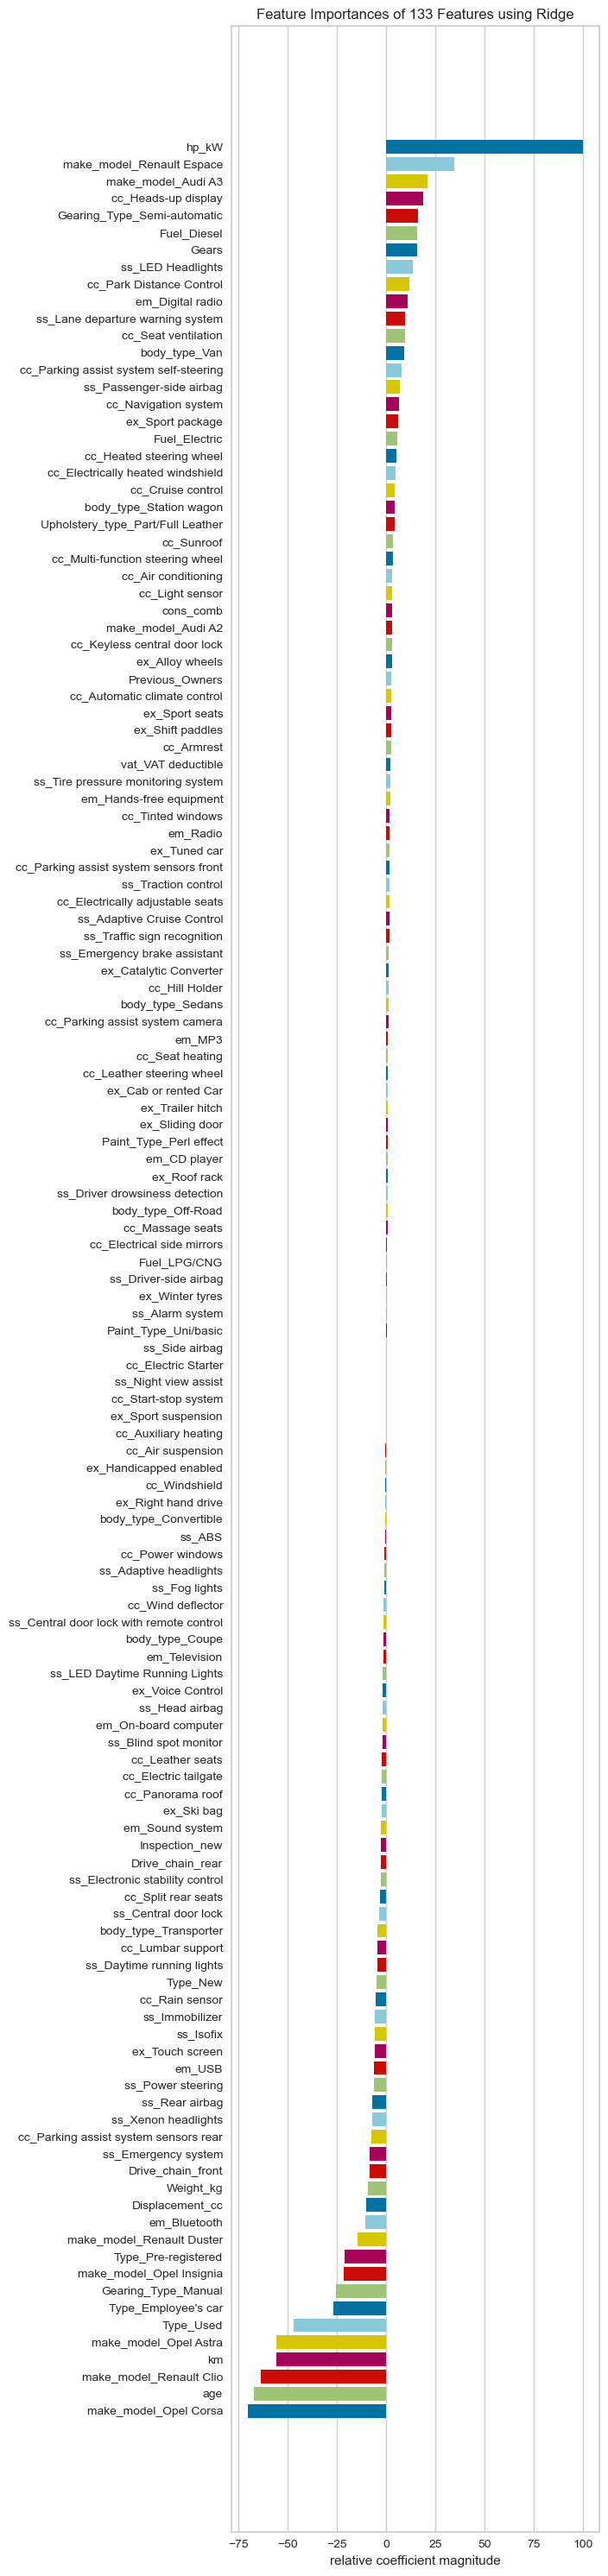

In [134]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

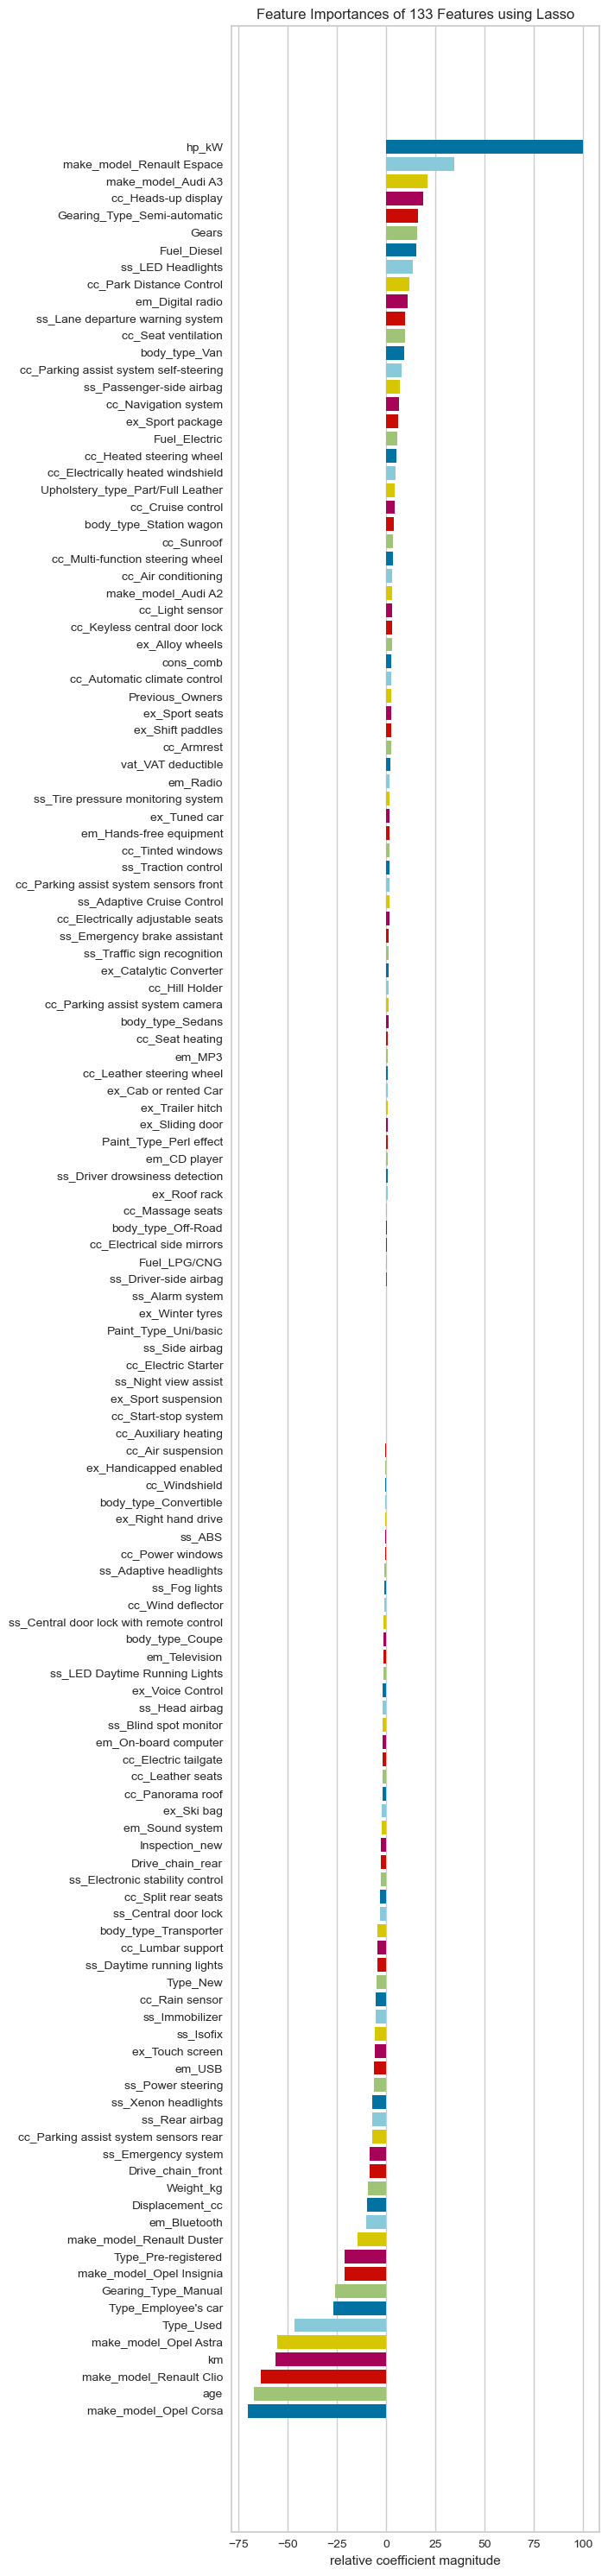

In [135]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [161]:
pd.DataFrame((X_train).columns)

0
0                                          km
1                                       Gears
2                                         age
3                             Previous_Owners
4                                       hp_kW
5                              Inspection_new
6                             Displacement_cc
7                                   Weight_kg
8                                   cons_comb
9                         cc_Air conditioning
10                          cc_Air suspension
11                                 cc_Armrest
12               cc_Automatic climate control
13                       cc_Auxiliary heating
14                          cc_Cruise control
15                        cc_Electric Starter
16                       cc_Electric tailgate
17                 cc_Electrical side mirrors
18           cc_Electrically adjustable seats
19          cc_Electrically heated windshield
20                        cc_Heads-up display
21                   cc_Heated steering wheel
22                             cc_Hill Holder
23               cc_Keyless central door lock
24                           cc_Leather seats
25                  cc_Leather steering wheel
26                            cc_Light sensor
27                          cc_Lumbar support
28                           cc_Massage seats
29           cc_Multi-function steering wheel
30                       cc_Navigation system
31                           cc_Panorama roof
32                   cc_Park Distance Control
33            cc_Parking assist system camera
34     cc_Parking assist system self-steering
35     cc_Parking assist system sensors front
36      cc_Parking assist system sensors rear
37                           cc_Power windows
38                             cc_Rain sensor
39                            cc_Seat heating
40                        cc_Seat ventilation
41                        cc_Split rear seats
42                       cc_Start-stop system
43                                 cc_Sunroof
44                          cc_Tinted windows
45                          cc_Wind deflector
46                              cc_Windshield
47                               em_Bluetooth
48                               em_CD player
49                           em_Digital radio
50                    em_Hands-free equipment
51                                     em_MP3
52                       em_On-board computer
53                                   em_Radio
54                            em_Sound system
55                              em_Television
56                                     em_USB
57                            ex_Alloy wheels
58                       ex_Cab or rented Car
59                     ex_Catalytic Converter
60                     ex_Handicapped enabled
61                        ex_Right hand drive
62                               ex_Roof rack
63                           ex_Shift paddles
64                                 ex_Ski bag
65                            ex_Sliding door
66                           ex_Sport package
67                             ex_Sport seats
68                        ex_Sport suspension
69                            ex_Touch screen
70                           ex_Trailer hitch
71                               ex_Tuned car
72                           ex_Voice Control
73                            ex_Winter tyres
74                                     ss_ABS
75                 ss_Adaptive Cruise Control
76                     ss_Adaptive headlights
77                            ss_Alarm system
78                      ss_Blind spot monitor
79                       ss_Central door lock
80   ss_Central door lock with remote control
81                  ss_Daytime running lights
82             ss_Driver drowsiness detection
83                      ss_Driver-side airbag
84            ss_Electronic stability control
85               ss_Emergency brake assistant
86                        ss_Emergency sys

# Feature Selection

In [136]:
pd.DataFrame(df.columns)

0
0                                       price
1                                          km
2                                       Gears
3                                         age
4                             Previous_Owners
5                                       hp_kW
6                              Inspection_new
7                             Displacement_cc
8                                   Weight_kg
9                                   cons_comb
10                        cc_Air conditioning
11                          cc_Air suspension
12                                 cc_Armrest
13               cc_Automatic climate control
14                       cc_Auxiliary heating
15                          cc_Cruise control
16                        cc_Electric Starter
17                       cc_Electric tailgate
18                 cc_Electrical side mirrors
19           cc_Electrically adjustable seats
20          cc_Electrically heated windshield
21                        cc_Heads-up display
22                   cc_Heated steering wheel
23                             cc_Hill Holder
24               cc_Keyless central door lock
25                           cc_Leather seats
26                  cc_Leather steering wheel
27                            cc_Light sensor
28                          cc_Lumbar support
29                           cc_Massage seats
30           cc_Multi-function steering wheel
31                       cc_Navigation system
32                           cc_Panorama roof
33                   cc_Park Distance Control
34            cc_Parking assist system camera
35     cc_Parking assist system self-steering
36     cc_Parking assist system sensors front
37      cc_Parking assist system sensors rear
38                           cc_Power windows
39                             cc_Rain sensor
40                            cc_Seat heating
41                        cc_Seat ventilation
42                        cc_Split rear seats
43                       cc_Start-stop system
44                                 cc_Sunroof
45                          cc_Tinted windows
46                          cc_Wind deflector
47                              cc_Windshield
48                               em_Bluetooth
49                               em_CD player
50                           em_Digital radio
51                    em_Hands-free equipment
52                                     em_MP3
53                       em_On-board computer
54                                   em_Radio
55                            em_Sound system
56                              em_Television
57                                     em_USB
58                            ex_Alloy wheels
59                       ex_Cab or rented Car
60                     ex_Catalytic Converter
61                     ex_Handicapped enabled
62                        ex_Right hand drive
63                               ex_Roof rack
64                           ex_Shift paddles
65                                 ex_Ski bag
66                            ex_Sliding door
67                           ex_Sport package
68                             ex_Sport seats
69                        ex_Sport suspension
70                            ex_Touch screen
71                           ex_Trailer hitch
72                               ex_Tuned car
73                           ex_Voice Control
74                            ex_Winter tyres
75                                     ss_ABS
76                 ss_Adaptive Cruise Control
77                     ss_Adaptive headlights
78                            ss_Alarm system
79                      ss_Blind spot monitor
80                       ss_Central door lock
81   ss_Central door lock with remote control
82                  ss_Daytime running lights
83             ss_Driver drowsiness detection
84                      ss_Driver-side airbag
85            ss_Electronic stability control
86               ss_Emergency brake assist

In [137]:
X_new = pd.DataFrame(df)[["Gearing_Type_Semi-automatic",
                          "Gears",
                          "Fuel_Diesel",
                          "cc_Heads-up display",
                          "make_model_Audi A3",
                          "Gearing_Type_Manual",
                          "Type_Employee's car",
                          "make_model_Renault Clio",
                          "make_model_Opel Insignia",
                          "make_model_Opel Astra",
                          "make_model_Opel Corsa",
                          "age",
                          "Type_Pre-registered",
                          "Type_Used",
                          "km",
                          "make_model_Renault Espace",
                          "hp_kW"]]
X_new

Gearing_Type_Semi-automatic  Gears  Fuel_Diesel  cc_Heads-up display  \
0                                0  7.000            1                    0   
1                                0  7.000            0                    0   
2                                0  7.000            1                    0   
3                                0  6.000            1                    1   
4                                0  7.000            1                    0   
...                            ...    ...          ...                  ...   
15907                            0  6.000            1                    1   
15908                            0  6.000            1                    0   
15909                            0  6.000            0                    1   
15911                            0  7.000            0                    1   
15912                            0  6.000            1                    1   

       make_model_Audi A3  Gearing_Type_Manual  Type_Employee's car  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
15907                   0                    0                    0   
15908                   0                    0                    0   
15909                   0                    0                    0   
15911                   0                    0                    0   
15912                   0                    0                    0   

       make_model_Renault Clio  make_model_Opel Insignia  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
15907                        0                         0   
15908                        0                         0   
15909                        0                         0   
15911                        0                         0   
15912                        0                         0   

       make_model_Opel Astra  make_model_Opel Corsa   age  \
0                          0                      0 3.000   
1                          0                      0 2.000   
2                          0                      0 3.000   
3                          0                      0 3.000   
4                          0                      0 3.000   
...                      ...                    ...   ...   
15907                      0                      0 0.000   
15908                      0                      0 0.000   
15909                      0                      0 0.000   
15911                      0                      0 0.000   
15912                      0                      0 0.000   

       Type_Pre-registered  Type_Used        km  make_model_Renault Espace  \
0                        0          1 56013.000                          0   
1                        0          1 80000.000                          0   
2                        0          1 83450.000                          0   
3                        0          1 73000.000                          0   
4                        0          1 16200.000                          0   
...                    ...        ...       ...                        ...   
15907                    1          0   100.000                          1   
15908                    0          0  1647.363                          1   
15909                    0          0  1000.000  

In [138]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=101)

In [139]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [140]:
lasso_model2 = Lasso(alpha=1)
lasso_model2.fit(X_train_scaled2, y_train2)

Lasso(alpha=1)

In [141]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [142]:
lnew = train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")  
lnew

lasso_new_train  lasso_new_test
R2              0.866           0.861
mae          1872.831        1875.718
mse       7464077.117     7401927.388
rmse         2732.046        2720.648

In [143]:
lgs

grid_lasso_train  grid_lasso_test
R2               0.891            0.884
mae           1714.321         1733.947
mse        6114698.054      6177777.083
rmse          2472.792         2485.513

In [144]:
# Modelin hata ortalamasını gerçek değerlerin ortalamasına bölerek modelin hata oranı hakkında yorum yapabiliriz.

In [145]:
2720.648 / y.mean() # 17 feature ile hata oranı %15.0

np.float64(0.15030399374644887)

In [146]:
2485.513 / y.mean() # 133 feature ile hata oranı %13.7 

np.float64(0.13731380553776798)

# Compare Models Performance

In [147]:
pd.concat([lgs, lnew], axis=1)

grid_lasso_train  grid_lasso_test  lasso_new_train  lasso_new_test
R2               0.891            0.884            0.866           0.861
mae           1714.321         1733.947         1872.831        1875.718
mse        6114698.054      6177777.083      7464077.117     7401927.388
rmse          2472.792         2485.513         2732.046        2720.648

# Final Model

In [148]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [149]:
final_model = Lasso(alpha = 1)
final_model.fit(X_scaled, y)

Lasso(alpha=1)

# Prediction with new observation

In [162]:
new_sample = pd.DataFrame([{
    # Sayısal
    "km": 60000,
    "Gears": 6,
    "age": 3,
    "Previous_Owners": 1,
    "hp_kW": 110,
    "Inspection_new": 1,
    "Displacement_cc": 1598,
    "Weight_kg": 1300,
    "cons_comb": 4.5,

    # Comfort & Convenience (cc_)
    "cc_Air conditioning": 1,
    "cc_Air suspension": 0,
    "cc_Armrest": 1,
    "cc_Automatic climate control": 1,
    "cc_Auxiliary heating": 0,
    "cc_Cruise control": 1,
    "cc_Electric Starter": 1,
    "cc_Electric tailgate": 0,
    "cc_Electrical side mirrors": 1,
    "cc_Electrically adjustable seats": 0,
    "cc_Electrically heated windshield": 0,
    "cc_Heads-up display": 0,
    "cc_Heated steering wheel": 0,
    "cc_Hill Holder": 1,
    "cc_Keyless central door lock": 1,
    "cc_Leather seats": 0,
    "cc_Leather steering wheel": 1,
    "cc_Light sensor": 1,
    "cc_Lumbar support": 0,
    "cc_Massage seats": 0,
    "cc_Multi-function steering wheel": 1,
    "cc_Navigation system": 1,
    "cc_Panorama roof": 0,
    "cc_Park Distance Control": 1,
    "cc_Parking assist system camera": 0,
    "cc_Parking assist system self-steering": 0,
    "cc_Parking assist system sensors front": 1,
    "cc_Parking assist system sensors rear": 1,
    "cc_Power windows": 1,
    "cc_Rain sensor": 1,
    "cc_Seat heating": 1,
    "cc_Seat ventilation": 0,
    "cc_Split rear seats": 1,
    "cc_Start-stop system": 1,
    "cc_Sunroof": 0,
    "cc_Tinted windows": 1,
    "cc_Wind deflector": 0,
    "cc_Windshield": 1,

    # Entertainment & Media (em_)
    "em_Bluetooth": 1,
    "em_CD player": 0,
    "em_Digital radio": 1,
    "em_Hands-free equipment": 1,
    "em_MP3": 1,
    "em_On-board computer": 1,
    "em_Radio": 1,
    "em_Sound system": 1,
    "em_Television": 0,
    "em_USB": 1,

    # Exterior (ex_)
    "ex_Alloy wheels": 1,
    "ex_Cab or rented Car": 0,
    "ex_Catalytic Converter": 1,
    "ex_Handicapped enabled": 0,
    "ex_Right hand drive": 0,
    "ex_Roof rack": 0,
    "ex_Shift paddles": 0,
    "ex_Ski bag": 0,
    "ex_Sliding door": 0,
    "ex_Sport package": 0,
    "ex_Sport seats": 0,
    "ex_Sport suspension": 0,
    "ex_Touch screen": 1,
    "ex_Trailer hitch": 0,
    "ex_Tuned car": 0,
    "ex_Voice Control": 1,
    "ex_Winter tyres": 0,

    # Safety & Security (ss_)
    "ss_ABS": 1,
    "ss_Adaptive Cruise Control": 0,
    "ss_Adaptive headlights": 0,
    "ss_Alarm system": 1,
    "ss_Blind spot monitor": 0,
    "ss_Central door lock": 1,
    "ss_Central door lock with remote control": 1,
    "ss_Daytime running lights": 1,
    "ss_Driver drowsiness detection": 0,
    "ss_Driver-side airbag": 1,
    "ss_Electronic stability control": 1,
    "ss_Emergency brake assistant": 1,
    "ss_Emergency system": 0,
    "ss_Fog lights": 1,
    "ss_Head airbag": 1,
    "ss_Immobilizer": 1,
    "ss_Isofix": 1,
    "ss_LED Daytime Running Lights": 1,
    "ss_LED Headlights": 0,
    "ss_Lane departure warning system": 0,
    "ss_Night view assist": 0,
    "ss_Passenger-side airbag": 1,
    "ss_Power steering": 1,
    "ss_Rear airbag": 0,
    "ss_Side airbag": 1,
    "ss_Tire pressure monitoring system": 1,
    "ss_Traction control": 1,
    "ss_Traffic sign recognition": 0,
    "ss_Xenon headlights": 0,

    # Make / Model
    "make_model_Audi A2": 0,
    "make_model_Audi A3": 1,
    "make_model_Opel Astra": 0,
    "make_model_Opel Corsa": 0,
    "make_model_Opel Insignia": 0,
    "make_model_Renault Clio": 0,
    "make_model_Renault Duster": 0,
    "make_model_Renault Espace": 0,

    # Body type
    "body_type_Convertible": 0,
    "body_type_Coupe": 0,
    "body_type_Off-Road": 0,
    "body_type_Sedans": 1,
    "body_type_Station wagon": 0,
    "body_type_Transporter": 0,
    "body_type_Van": 0,

    # VAT & Type
    "vat_VAT deductible": 1,
    "Type_Employee's car": 0,
    "Type_New": 0,
    "Type_Pre-registered": 0,
    "Type_Used": 1,

    # Fuel
    "Fuel_Diesel": 1,
    "Fuel_Electric": 0,
    "Fuel_LPG/CNG": 0,

    # Paint / Upholstery
    "Paint_Type_Perl effect": 0,
    "Paint_Type_Uni/basic": 1,
    "Upholstery_type_Part/Full Leather": 1,

    # Gear / Drive
    "Gearing_Type_Manual": 1,
    "Gearing_Type_Semi-automatic": 0,
    "Drive_chain_front": 1,
    "Drive_chain_rear": 0
}])


In [163]:
scaled_sample = final_scaler.transform(new_sample)
scaled_sample

array([[ 7.43928013e-01,  8.60175774e-02,  1.42853799e+00,
        -1.20909156e-01,  8.01835120e-01,  1.70350163e+00,
         5.94997906e-01, -2.10690575e-01, -3.77180681e-01,
         2.18330229e-01, -6.82331020e-02,  1.01528318e+00,
         8.32863466e-01, -1.27835708e-01,  6.02820609e-01,
         1.19335661e+02, -2.81106987e-01,  5.09265117e-01,
        -3.86740437e-01, -2.58179551e-01, -2.04929019e-01,
        -5.15054113e-01,  1.10913978e+00,  2.24782087e+00,
        -5.81524770e-02,  7.76483278e-01,  9.69977226e-01,
        -5.42345856e-01, -1.54967595e-01,  5.80539327e-01,
         9.11238715e-01, -2.04929019e-01,  6.90709377e-01,
        -5.57182829e-01, -2.33272863e-01,  1.21739455e+00,
         7.42801585e-01,  2.64313789e-01,  8.52111382e-01,
         1.04805699e+00, -2.45246607e-01,  2.25644216e+00,
         8.30085385e-01, -1.62408366e-01,  3.00375088e+00,
        -5.37319330e-02,  3.44359308e+01,  5.01381976e-01,
        -6.92262417e-01,  2.42080736e+00,  7.23669429e-0

In [164]:
final_model.predict(scaled_sample)

array([17555.47690465])